### Named Entity Recognition

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

### hsbc

In [ ]:
#import HSBC's news data

from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

hsbc_news = pd.read_excel(r"/content/gdrive/My Drive/Dataset/News_Info_part3.xlsx",sheet_name='HSBC')
hsbc_news['date']=pd.to_datetime(hsbc_news['date']).dt.date
hsbc_news

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,date,title,content,link,symbols,tags,sentiment
0,2024-05-08,HSBC Holdings PLC's Dividend Analysis,Exploring the Sustainability of HSBC Holdings ...,https://finance.yahoo.com/news/hsbc-holdings-p...,"['0005.HK', 'H1SB34.SA', 'HBC1.BE', 'HBC1.DU',...",[],"{'polarity': 0.998, 'neg': 0.014, 'neu': 0.861..."
1,2024-05-06,Top Three UK Dividend Stocks To Watch In May 2024,As the FTSE 100 mirrors a positive trend in gl...,https://finance.yahoo.com/news/top-three-uk-di...,"['0005.HK', 'BYG.LSE', 'DCC.LSE', 'GFTU.LSE', ...",[],"{'polarity': 0.998, 'neg': 0.013, 'neu': 0.879..."
2,2024-05-04,Ping An votes against reappointment of HSBC CE...,(Reuters) - HSBC Holdings Plc's biggest Asian ...,https://finance.yahoo.com/news/ping-votes-agai...,"['0005.HK', '2318.HK', '601318.SHG', 'H1SB34.S...",[],"{'polarity': -0.477, 'neg': 0.044, 'neu': 0.93..."
3,2024-05-04,HSBC Holdings First Quarter 2024 Earnings: Bea...,HSBC Holdings (LON:HSBA) First Quarter 2024 Re...,https://finance.yahoo.com/news/hsbc-holdings-f...,"['0005.HK', 'H1SB34.SA', 'HBC1.BE', 'HBC1.DU',...",[],"{'polarity': 0.776, 'neg': 0.035, 'neu': 0.911..."
4,2024-05-03,3 Foreign Bank Stocks Worth a Look in a Prospe...,Banks across the globe have been continuously ...,https://finance.yahoo.com/news/3-foreign-bank-...,"['0005.HK', 'GSPC.INDX', 'H1SB34.SA', 'HBC1.BE...",[],"{'polarity': 1, 'neg': 0.013, 'neu': 0.852, 'p..."
...,...,...,...,...,...,...,...
1544,2021-03-31,London housing market falls behind amid work f...,A Sold estate agent board sign by Purple Brick...,https://uk.finance.yahoo.com/news/nationwide-h...,"['0005.HK', 'BCS.US', 'BKGFF.US', 'BKGFY.US', ...","['GETTY IMAGES', 'HOUSE PRICE', 'LONDON', 'PRI...","{'polarity': 0.984, 'neg': 0.025, 'neu': 0.882..."
1545,2021-03-26,Workers could quit their jobs if forced to sta...,Sunak urged firms that have benefitted from th...,https://uk.finance.yahoo.com/news/workers-coul...,"['0005.HK', 'HSBC.US', 'LLDTF.US', 'LYG.US', '...","['OFFICE ENVIRONMENT', 'SUNAK', 'UK', 'UK ECON...","{'polarity': 0.983, 'neg': 0.03, 'neu': 0.891,..."
1546,2021-03-26,"UK banks can withstand COVID shock, says Bank ...","Barclays, Citi and HSBC London HQs form the Ca...",https://uk.finance.yahoo.com/news/bank-of-engl...,"['0005.HK', 'HSBC.US', 'LLDTF.US', 'LYG.US', '...","['BANK OF ENGLAND', 'CANARY WHARF', 'FINANCIAL...","{'polarity': 0.91, 'neg': 0.065, 'neu': 0.833,..."
1547,2021-03-25,Santander to shut 111 branches and make Milton...,Santander announced a sweeping overhaul of its...,https://uk.finance.yahoo.com/news/santander-br...,"['0005.HK', 'BCS.US', 'HSBC.US', 'LLDTF.US', '...","['LONDON', 'SANTANDER']","{'polarity': 0.91, 'neg': 0.022, 'neu': 0.951,..."


In [ ]:
name_list = []
for content in hsbc_news['content']:
  doc = nlp(content)
  for ent in doc.ents:
    if ent.label_ == "ORG" and "HSBC" not in ent.text:
      name_list.append(ent.text)

In [ ]:
org = pd.DataFrame(name_list,columns=['Organization Name'])
org['Organization Name'].value_counts()

,count
Organization Name,
Reuters,549
NYSE,453
Zacks Investment Research,427
Zacks Rank,375
MOODY,292
...,...
Edinburgh Mortgage Advice,1
Clayhall Financial Services,1
Private Finance,1


In [ ]:
pd.DataFrame(org['Organization Name'].value_counts()).to_excel('/content/gdrive/My Drive/Dataset/hsbc_org.xlsx')

### toyota

In [ ]:
#import toyota's news data

from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

toyota_news = pd.read_excel(r"/content/gdrive/My Drive/Dataset/News_Info.xlsx",sheet_name='Toyota')
toyota_news['date']=pd.to_datetime(toyota_news['date']).dt.date
toyota_news

Mounted at /content/gdrive


,date,title,content,link,symbols,tags,sentiment
0,2024-05-08,Toyota issues muted profit forecast following ...,"Toyota (TM), the world’s largest automaker by ...",https://finance.yahoo.com/news/toyota-issues-m...,"['7203.TSE', 'TM.US', 'TMCO34.SA', 'TMN.MX', '...",[],"{'polarity': 0.988, 'neg': 0.018, 'neu': 0.89,..."
1,2024-05-08,Every household should be forced to have a sma...,Chris O'Shea has urged ministers to make it 'm...,https://uk.finance.yahoo.com/news/every-househ...,"['1BMW.MI', '2330.TW', '7203.TSE', '9984.TSE',...",[],"{'polarity': 1, 'neg': 0.068, 'neu': 0.835, 'p..."
2,2024-05-08,"Trending tickers: Apple, Reddit, JD Wetherspoo...",Apple unveiled a new artificial intelligence-f...,https://uk.finance.yahoo.com/news/apple-reddit...,"['7203.TSE', 'ARM.US', 'TM.US', 'TMCO34.SA', '...",[],"{'polarity': 0.996, 'neg': 0.036, 'neu': 0.854..."
3,2024-05-08,Toyota Motor Projects Drop in Fiscal-Year Prof...,Toyota Motor projected a drop in fiscal-year p...,https://finance.yahoo.com/m/897f11c2-e377-3c94...,"['6201.TSE', '7203.TSE', 'TAH.F', 'TM.US', 'TM...",[],"{'polarity': 0.733, 'neg': 0.129, 'neu': 0.573..."
4,2024-05-08,"Toyota racks up booming profit, vows to invest...",TOKYO (AP) — Toyota doubled its net profit in ...,https://finance.yahoo.com/news/toyota-racks-bo...,"['7203.TSE', 'TM.US', 'TMCO34.SA', 'TOM.BE', '...",[],"{'polarity': 0.971, 'neg': 0.03, 'neu': 0.886,..."
...,...,...,...,...,...,...,...
3841,2016-03-09,U.S. Winners of Toyota Dream Car Art Contest A...,"TORRANCE, Calif., March 9, 2016 (GLOBE NEWSWIR...",https://www.globenewswire.com/news-release/201...,['TM.US'],"['AUTOMOTIVE', 'FINANCING', 'TOYOTA MOTOR CRED...","{'polarity': 1, 'neg': 0.001, 'neu': 0.835, 'p..."
3842,2016-02-03,Toyota Receives Corporate Partnership Award at...,"NEW YORK, Feb. 03, 2016 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/201...,['TM.US'],"['AUTOMOTIVE', 'BUSINESS COMMUNITY', 'NYSE:TM'...","{'polarity': 0.994, 'neg': 0, 'neu': 0.876, 'p..."
3843,2015-10-16,Toyota Family Learning Answers a White House C...,"NEW YORK, Oct. 16, 2015 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/201...,['TM.US'],"['NYSE:TM', 'TOYOTA MOTOR NORTH AMERICA']","{'polarity': 0.998, 'neg': 0.006, 'neu': 0.835..."
3844,2015-09-21,Toyota Wins Corporation of the Year at USHCC N...,"HOUSTON, Sept. 21, 2015 (GLOBE NEWSWIRE) -- To...",https://www.globenewswire.com/news-release/201...,['TM.US'],"['AUTOMOTIVE', 'CORPORATE', 'NYSE:TM', 'TOYOTA...","{'polarity': 0.996, 'neg': 0, 'neu': 0.897, 'p..."


In [ ]:
doc = nlp(toyota_news['content'][0])
for ent in doc.ents:
    if ent.label_ == "ORG" and "Toyota" not in ent.text:
      print(ent.text)

TM
ADR
NYSE
Getty Images
Honda
Hyundai
Ford
GM
Pras Subramanian
Yahoo Finance
Yahoo Finance


In [ ]:
name_list = []
for content in toyota_news['content']:
  doc = nlp(content)
  for ent in doc.ents:
    if ent.label_ == "ORG" and "Toyota" not in ent.text:
      name_list.append(ent.text)

In [ ]:
org = pd.DataFrame(name_list,columns=['Organization Name'])
org['Organization Name'].value_counts()

,count
Organization Name,
NYSE,4721
EV,4220
Tesla,2982
TM,2757
Ford,1766
...,...
SEIJI SUGIURA,1
TOKAI TOKYO RESEARCH INSTITUTE,1
the 'Toyoda Route',1


In [ ]:
pd.DataFrame(org['Organization Name'].value_counts()).to_excel('/content/gdrive/My Drive/Dataset/toyota_org.xlsx')

In [ ]:
org['Organization Name'].value_counts()[:60]

,count
Organization Name,
NYSE,4721
EV,4220
Tesla,2982
TM,2757
Ford,1766
GM,1591
Reuters,1192
Zacks Investment Research,965
Lexus,955


### apple

In [ ]:
apple_news = pd.read_excel(r"/content/gdrive/My Drive/Dataset/News_Info.xlsx",sheet_name='Apple')
apple_news

,date,title,content,link,symbols,tags,sentiment
0,2024-05-08T21:49:00+00:00,Judge grills Apple exec about whether company ...,"OAKLAND, Calif. (AP) — A federal judge on Wedn...",https://finance.yahoo.com/news/judge-grills-ap...,"['0R2V.IL', 'AAPL.BA', 'AAPL.MX', 'AAPL.NEO', ...",[],"{'polarity': 0.956, 'neg': 0.035, 'neu': 0.899..."
1,2024-05-08T21:20:50+00:00,Apple’s Unionized Maryland Store to Vote on Po...,(Bloomberg) -- Apple Inc.’s unionized retail s...,https://finance.yahoo.com/news/apple-unionized...,"['0R2V.IL', 'AAPL.BA', 'AAPL.MX', 'AAPL.NEO', ...",[],"{'polarity': -0.902, 'neg': 0.1, 'neu': 0.842,..."
2,2024-05-08T19:51:48+00:00,Music streaming firms urge European Commission...,By Jaspreet Singh\n\n(Reuters) - A group that ...,https://finance.yahoo.com/news/music-streaming...,"['0R2V.IL', '639.F', '639.STU', '639.XETRA', '...",[],"{'polarity': 0.055, 'neg': 0.029, 'neu': 0.944..."
3,2024-05-08T19:10:27+00:00,The 3 Best Metaverse Stocks to Buy in May 2024,Meta Platforms (NASDAQ:META) is still losing b...,https://finance.yahoo.com/news/3-best-metavers...,"['AAPL.US', 'ELF.US', 'META.US', 'MSFT.US', 'N...",[],"{'polarity': 0.997, 'neg': 0.016, 'neu': 0.884..."
4,2024-05-08T18:40:58+00:00,Apple’s iPad event was an AI teaser for its fu...,"Apple’s (AAPL) AI push has begun. On Tuesday, ...",https://finance.yahoo.com/news/apples-ipad-eve...,"['0QYP.IL', '0QZD.LSE', '0QZI.LSE', '0R1O.IL',...",[],"{'polarity': 0.972, 'neg': 0.002, 'neu': 0.943..."
...,...,...,...,...,...,...,...
26745,2018-01-31T12:55:00+00:00,Investor Expectations to Drive Momentum within...,"NEW YORK, Jan. 31, 2018 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/201...,"['AAPL.US', 'AVHI.US', 'FARM.US', 'GM.US', 'SG...",['FUNDAMENTAL MARKETS'],"{'polarity': 0.995, 'neg': 0.009, 'neu': 0.937..."
26746,2017-11-30T14:27:00+00:00,"BioTelemetry, Inc. Enters Agreement to Provide...","MALVERN, Pa., Nov. 30, 2017 (GLOBE NEWSWIRE)...",https://www.globenewswire.com/news-release/201...,"['AAPL.US', 'BEAT.US']","['BIOTELEMETRY', 'INC', 'NASDAQ:BEAT']","{'polarity': 0.989, 'neg': 0.021, 'neu': 0.804..."
26747,2017-11-27T13:00:00+00:00,"Factors of Influence in 2018, Key Indicators a...","NEW YORK, Nov. 27, 2017 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/201...,"['AAPL.US', 'CSCO.US', 'GD.US', 'HPE.US', 'NVD...",['FUNDAMENTAL MARKETS'],"{'polarity': 0.997, 'neg': 0.008, 'neu': 0.926..."
26748,2017-10-05T15:58:00+00:00,New Research: Key Drivers of Growth for Micros...,"NEW YORK, Oct. 05, 2017 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/201...,"['AAPL.US', 'AMZN.US', 'INTC.US', 'MSFT.US', '...",['FUNDAMENTAL MARKETS'],"{'polarity': 0.997, 'neg': 0.008, 'neu': 0.925..."


In [ ]:
name_list2 = []
for content in apple_news['content']:
  doc = nlp(content)
  for ent in doc.ents:
    if ent.label_ == "ORG" and "Apple" not in ent.text:
      name_list2.append(ent.text)

In [ ]:
org2 = pd.DataFrame(name_list2,columns=['Organization Name'])
org2['Organization Name'].value_counts()

,count
Organization Name,
NYSE,31833
Google,9021
Amazon,8964
Microsoft,8785
AI,8643
...,...
Bonds Pare Gains: Markets Wrap,1
Global Vehicle Sales Target,1
Rheinmetall Clinches Quarter Billion Euro Order For New Type Of Contactors,1


In [ ]:
pd.DataFrame(org2['Organization Name'].value_counts()[:60]).to_excel('/content/gdrive/My Drive/Dataset/apple_org.xlsx')

In [ ]:
org2['Organization Name'].value_counts()[:40]

,count
Organization Name,
NYSE,31833
Google,9021
Amazon,8964
Microsoft,8785
AI,8643
NASDAQ,7554
iPhone,6442
MSFT,4880
Fed,4447


### tencent

In [ ]:
Tencent_news = pd.read_excel(r"/content/gdrive/My Drive/Dataset/News_Info.xlsx",sheet_name='Tencent')
Tencent_news

,date,title,content,link,symbols,tags,sentiment
0,2024-05-08T07:47:13+00:00,"Tencent, Alibaba Earnings Are Key to Longer Ch...",(Bloomberg) -- The bounceback in Chinese stock...,https://finance.yahoo.com/news/chinese-stock-r...,"['0700.HK', '2RR.F', '9988.HK', 'AHLA.F', 'AHL...",[],"{'polarity': 0.996, 'neg': 0.039, 'neu': 0.854..."
1,2024-05-07T18:14:40+00:00,The 3 Most Undervalued Chinese Stocks to Buy i...,The Chinese economy and many Chinese companies...,https://finance.yahoo.com/news/3-most-underval...,"['0700.HK', '9888.HK', 'B1C.F', 'B1C.STU', 'B1...",[],"{'polarity': 0.999, 'neg': 0.035, 'neu': 0.774..."
2,2024-05-04T10:34:00+00:00,Stock Market Crash Alert: 3 Must-Buy Social Me...,Social media stocks have had plenty of activit...,https://finance.yahoo.com/news/stock-market-cr...,"['0700.HK', 'DJT.US', 'META.US', 'NNN1.BE', 'N...",[],"{'polarity': 0.997, 'neg': 0.027, 'neu': 0.852..."
3,2024-05-03T18:39:42+00:00,3 Under-The-Radar Stocks That Could Be Worth O...,There are no true “under-the-radar stocks” in ...,https://finance.yahoo.com/news/3-under-radar-s...,"['0700.HK', '0YXG.LSE', '1YD.BE', '1YD.DU', '1...",[],"{'polarity': 0.998, 'neg': 0.019, 'neu': 0.863..."
4,2024-04-30T10:35:00+00:00,Alibaba Stock Analysis: Why BABA Is a China Be...,If any company reflects the state of China’s e...,https://finance.yahoo.com/news/alibaba-stock-a...,"['0700.HK', '2RR.F', '9988.HK', 'AHLA.F', 'AHL...",[],"{'polarity': 0.988, 'neg': 0.066, 'neu': 0.817..."
...,...,...,...,...,...,...,...
1681,2020-04-06T07:49:21+00:00,Credit Suisse Drops Off WeDoctor’s Planned Hon...,(Bloomberg) -- Credit Suisse Group AG has drop...,https://finance.yahoo.com/news/credit-suisse-d...,"['0700.HK', '1299.HK', 'A0TUHD.F', 'AAGIY.US',...","['BLOOMBERG', 'BLOOMBERG NEWS', 'CHINA', 'CRED...","{'polarity': 0.973, 'neg': 0.046, 'neu': 0.842..."
1682,2020-03-27T06:12:13+00:00,"WeDoctor to Pick JPMorgan, Credit Suisse, CMB ...","(Bloomberg) -- WeDoctor, one of China’s bigges...",https://finance.yahoo.com/news/wedoctor-said-p...,"['0700.HK', '1299.HK', 'A0TUHD.F', 'AAGIY.US',...","['BLOOMBERG', 'CMB', 'CREDIT SUISSE', 'INITIAL...","{'polarity': 0.99, 'neg': 0.019, 'neu': 0.881,..."
1683,2019-12-20T07:00:00+00:00,Tencent Cloud and STMicroelectronics Announce ...,TencentOS Tiny LoRaWAN availability on STM32 p...,https://www.globenewswire.com/news-release/201...,"['0700.HK', 'STM.PA', 'STM.US']","['PARIS STOCK EXCHANGE:STM', 'STMICROELECTRONI...","{'polarity': 0.997, 'neg': 0.006, 'neu': 0.854..."
1684,2017-08-09T10:30:00+00:00,"Sky9 Capital Announces the Addition of Chay, T...","HONG KONG, Aug. 09, 2017 (GLOBE NEWSWIRE) --...",https://www.globenewswire.com/news-release/201...,"['0700.HK', 'C76.SG', 'EDU.US']","['CHINA', 'RON CAO', 'SKY9', 'SKY9 CAPITAL', '...","{'polarity': 0.996, 'neg': 0.004, 'neu': 0.885..."


In [ ]:
name_list3 = []
for content in Tencent_news['content']:
  doc = nlp(content)
  for ent in doc.ents:
    if ent.label_ == "ORG" and "Tecent" not in ent.text:
      name_list3.append(ent.text)

In [ ]:
org3 = pd.DataFrame(name_list3,columns=['Organization Name'])
org3['Organization Name'].value_counts()

,count
Organization Name,
Tencent,1735
AI,846
WeChat,672
TCEHY,512
Reuters,481
...,...
Artificial Intelligence and Immersive Convergence,1
the Chinese Academy of Sciences Zhu Min,1
the James Webb Space,1


In [ ]:
org3['Organization Name'].value_counts()[:60]

,count
Organization Name,
Tencent,1735
AI,846
WeChat,672
TCEHY,512
Reuters,481
ByteDance,381
NYSE,373
Baidu,365
NetEase,344


In [ ]:
pd.DataFrame(org3['Organization Name'].value_counts()[:60]).to_excel('/content/gdrive/My Drive/Dataset/tencent_org.xlsx')

### pepsi

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

pepsi_news = pd.read_excel(r"/content/gdrive/My Drive/Dataset/News_Info_part2.xlsx",sheet_name='Pepsi')
pepsi_news['date']=pd.to_datetime(pepsi_news['date']).dt.date
pepsi_news

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,date,title,content,link,symbols,tags,sentiment
0,2024-05-08,Steady Dividend Plays: 3 Stocks Promising Reli...,The stock market has performed well so far thi...,https://finance.yahoo.com/news/steady-dividend...,"['JNJ.US', 'PEP.BE', 'PEP.DU', 'PEP.F', 'PEP.H...",[],"{'polarity': 0.998, 'neg': 0.014, 'neu': 0.869..."
1,2024-05-08,"7-Eleven, Inc. to Release New Limited Edition ...","7-Eleven®, Speedway® and Stripes® customers ca...",https://finance.yahoo.com/news/7-eleven-inc-re...,"['PEP.BE', 'PEP.DU', 'PEP.F', 'PEP.HM', 'PEP.M...",[],"{'polarity': 0.995, 'neg': 0.012, 'neu': 0.885..."
2,2024-05-08,UPS CFO Brian Newman is departing. But the fir...,Good morning. A delivery giant is searching fo...,https://finance.yahoo.com/news/ups-cfo-brian-n...,"['HD.MX', 'HD.NEO', 'HD.US', 'HDI.BE', 'HDI.DU...",[],"{'polarity': 0.998, 'neg': 0.015, 'neu': 0.874..."
3,2024-05-08,VDC: Strong and Steady Consumer Staples ETF,"Whether it’s Coca-Cola (NYSE:KO), Hershey (NYS...",https://finance.yahoo.com/news/vdc-strong-stea...,"['0J4X.LSE', '0P59.LSE', '4I1.BE', '4I1.F', '4...",[],"{'polarity': 0.999, 'neg': 0.032, 'neu': 0.817..."
4,2024-05-08,Steady Dividend Plays: 3 Stocks Promising Reli...,"Johnson &amp; Johnson, PepsiCo, and Southern C...",https://investorplace.com/2024/05/three-stocks...,"['JNJ.US', 'PEP.US']",[],"{'polarity': 0.671, 'neg': 0, 'neu': 0.766, 'p..."
...,...,...,...,...,...,...,...
3642,2018-02-05,Research Report Identifies Franklin Electric C...,"NEW YORK, Feb. 05, 2018 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/201...,"['BDX.US', 'FELE.US', 'FHN.US', 'OTTR.US', 'PE...",['FUNDAMENTAL MARKETS'],"{'polarity': 0.997, 'neg': 0.008, 'neu': 0.934..."
3643,2018-02-01,"PepsiCo, Inc. (Nasdaq: PEP) to Ring The Nasdaq...","ADVISORY, Feb. 01, 2018 (GLOBE NEWSWIRE) --\...",https://www.globenewswire.com/news-release/201...,"['NDAQ.US', 'PEP.US']","['ADVISORY', 'INC', 'NASDAQ', 'NASDAQ:NDAQ']","{'polarity': 0.996, 'neg': 0.004, 'neu': 0.866..."
3644,2017-11-29,Investor Expectations to Drive Momentum within...,"NEW YORK, Nov. 29, 2017 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/201...,"['DAL.US', 'HUM.US', 'NUAN.US', 'PEP.US', 'SYY...",['FUNDAMENTAL MARKETS'],"{'polarity': 0.995, 'neg': 0.009, 'neu': 0.936..."
3645,2017-10-24,Consolidated Research: 2018 Summary Expectatio...,"NEW YORK, Oct. 24, 2017 (GLOBE NEWSWIRE) -- ...",https://www.globenewswire.com/news-release/201...,"['GRPN.US', 'M.US', 'PEP.US', 'RDC.US', 'SLB.U...",['FUNDAMENTAL MARKETS'],"{'polarity': 0.996, 'neg': 0.012, 'neu': 0.926..."


In [ ]:
name_list = []
for content in pepsi_news['content']:
  doc = nlp(content)
  for ent in doc.ents:
    if ent.label_ == "ORG" and "Pepsi" not in ent.text:
      name_list.append(ent.text)

In [ ]:
org = pd.DataFrame(name_list,columns=['Organization Name'])
org['Organization Name'].value_counts()

,count
Organization Name,
NYSE,9637
EPS,1525
Zacks Rank,1223
Zacks Investment Research,1084
Coca-Cola,1051
...,...
Arm,1
Monster Corp.,1
Pernod Anise,1


In [ ]:
pd.DataFrame(org['Organization Name'].value_counts()).to_excel('/content/gdrive/My Drive/Dataset/pepsi_org.xlsx')

In [ ]:
org['Organization Name'].value_counts()[:60]

,count
Organization Name,
NYSE,9637
EPS,1525
Zacks Rank,1223
Zacks Investment Research,1084
Coca-Cola,1051
Frito-Lay,999
PEP,986
NASDAQ,836
Zacks.com,701


### Event Study

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

In [ ]:
def prepare_stock_data(ticker, start_date, end_date):
    stock_data = yf.Ticker(ticker)
    stock_data = stock_data.history(start=start_date, end=end_date)
    stock_data.index = pd.to_datetime(stock_data.index)
    stock_data['date'] = stock_data.index
    stock_data.reset_index(drop=True, inplace=True)
    stock_data['Return'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
    stock_data['date'] = pd.to_datetime(stock_data['date']).dt.date
    return stock_data

In [ ]:
def prepare_market_data(ticker, start_date, end_date):
    market_data = yf.Ticker(ticker)
    market_data = market_data.history(start=start_date, end=end_date)
    market_data.index = pd.to_datetime(market_data.index)
    market_data['date'] = market_data.index
    market_data.reset_index(drop=True, inplace=True)
    market_data['Market Return'] = np.log(market_data['Close'] / market_data['Close'].shift(1))
    market_data['date'] = pd.to_datetime(market_data['date']).dt.date
    return market_data

In [ ]:
def get_event_window(data,event_date):
  index = data[data['date'] == event_date].index[0]
  event_window = data.iloc[index-10:index+10,:]
  return event_window

def get_estimation_window(data,event_date):
  index = data[data['date'] == event_date].index[0]
  estimation_window = data.iloc[index-131:index-11,:]
  return estimation_window

In [ ]:
def calculate_abnormal_returns(event_window, estimation_window):
  # Market model: R_i = α + β * R_m
  X = sm.add_constant(estimation_window['Market Return'])  # Add a constant for the intercept α
  Y = estimation_window['Return']

  # Fit the model
  model = sm.OLS(Y, X).fit()

  # Get the α and β coefficients
  alpha, beta = model.params

  # Calculate expected returns based on the market model
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']

  # Calculate abnormal returns (AR)
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']

  # Calculate expected returns based on the market model
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']

  # Calculate abnormal returns (AR)
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']

  return event_window

In [ ]:
def t_test(event_window):

  # Calculate cumulative abnormal returns (CAR)
  CAR = event_window['Abnormal_Return'].sum()

  t_stat, p_value = ttest_1samp(event_window['Abnormal_Return'], 0)

  # Print results
  print(f'Cumulative Abnormal Return (CAR): {CAR:.4f}')
  print(f'T-statistic: {t_stat:.4f}')
  print(f'P-value: {p_value:.4f}')

  if p_value < 0.05:
      print("The abnormal returns are statistically significant at the 5% level.")
  else:
      print("The abnormal returns are not statistically significant.")

In [ ]:
def plot_cumulative_abnormal_returns(event_window, company_name):
  event_window.set_index('date',inplace=True)
  # Mark the event date
  plt.axvline(x=event_date, color='red', linestyle='--', label='Event Date')

  event_window['Abnormal_Return'].cumsum().plot()

  # Add labels and title
  plt.xlabel("Date")
  plt.ylabel("Cumulative Abnormal Return")
  plt.title("Event Study - " + company_name)
  plt.legend()
  plt.savefig("/content/gdrive/My Drive/Dataset/"+company_name+"event_study.png")
  plt.show()

In [ ]:
start_date = "2015-05-01"
end_date = "2024-09-20"

## Toyota

In [ ]:
toyota_df = prepare_stock_data('7203.T', start_date, end_date)
toyota_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,1247.627212,1250.183228,1234.696911,1250.183228,37228500,0.0,0.0,2015-05-01,NaN
1,1240.560537,1242.815828,1233.494031,1234.997559,40812500,0.0,0.0,2015-05-07,-0.012221
2,1234.696855,1255.144793,1231.389076,1244.770508,44073500,0.0,0.0,2015-05-08,0.007882
3,1262.962987,1262.962987,1235.147730,1238.154785,55217000,0.0,0.0,2015-05-11,-0.005329
4,1238.154774,1245.522095,1231.689625,1245.522095,35281500,0.0,0.0,2015-05-12,0.005933
...,...,...,...,...,...,...,...,...,...
2311,2448.542865,2479.088067,2435.733586,2476.132080,29466900,0.0,0.0,2024-09-12,0.036884
2312,2445.587042,2460.859645,2410.115192,2418.983154,33002900,0.0,0.0,2024-09-13,-0.023350
2313,2400.754443,2422.431684,2332.766733,2370.701904,33434800,0.0,0.0,2024-09-17,-0.020161
2314,2414.549113,2450.020962,2405.188486,2448.542969,28165900,0.0,0.0,2024-09-18,0.032307


In [ ]:
index_data = prepare_market_data("^N225",start_date, end_date)
index_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Market Return
0,19510.849609,19549.390625,19399.160156,19531.630859,154100000,0.0,0.0,2015-05-01,NaN
1,19356.460938,19461.080078,19257.849609,19291.990234,165700000,0.0,0.0,2015-05-07,-0.012345
2,19315.630859,19458.750000,19302.710938,19379.189453,181600000,0.0,0.0,2015-05-08,0.004510
3,19637.580078,19679.630859,19586.810547,19620.910156,214400000,0.0,0.0,2015-05-11,0.012396
4,19608.230469,19626.750000,19467.650391,19624.839844,203500000,0.0,0.0,2015-05-12,0.000200
...,...,...,...,...,...,...,...,...,...
2290,36185.621094,36902.210938,36172.261719,36833.269531,126300000,0.0,0.0,2024-09-12,0.033501
2291,36882.410156,36887.398438,36441.339844,36581.761719,115900000,0.0,0.0,2024-09-13,-0.006852
2292,36601.929688,36663.179688,35828.539062,36203.218750,127300000,0.0,0.0,2024-09-17,-0.010402
2293,36546.039062,36675.070312,36127.449219,36380.171875,99900000,0.0,0.0,2024-09-18,0.004876


In [ ]:
df_merge = pd.merge(toyota_df, index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,1240.560537,1242.815828,1233.494031,1234.997559,40812500,0.0,0.0,2015-05-07,-0.012221,-0.012345
1,1234.696855,1255.144793,1231.389076,1244.770508,44073500,0.0,0.0,2015-05-08,0.007882,0.004510
2,1262.962987,1262.962987,1235.147730,1238.154785,55217000,0.0,0.0,2015-05-11,-0.005329,0.012396
3,1238.154774,1245.522095,1231.689625,1245.522095,35281500,0.0,0.0,2015-05-12,0.005933,0.000200
4,1234.696470,1236.801353,1225.675307,1232.290771,47919000,0.0,0.0,2015-05-13,-0.010680,0.007102
...,...,...,...,...,...,...,...,...,...,...
2289,2448.542865,2479.088067,2435.733586,2476.132080,29466900,0.0,0.0,2024-09-12,0.036884,0.033501
2290,2445.587042,2460.859645,2410.115192,2418.983154,33002900,0.0,0.0,2024-09-13,-0.023350,-0.006852
2291,2400.754443,2422.431684,2332.766733,2370.701904,33434800,0.0,0.0,2024-09-17,-0.020161,-0.010402
2292,2414.549113,2450.020962,2405.188486,2448.542969,28165900,0.0,0.0,2024-09-18,0.032307,0.004876


In [ ]:
event_date = pd.to_datetime('2022-02-24')

df_merge[df_merge['date'] == event_date]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
1662,1943.107694,1956.927805,1916.849481,1926.52356,29577000,0.0,0.0,2022-02-24,-0.015423,-0.018268


In [ ]:
# Event window [-10, +10]
event_window = get_event_window(df_merge,event_date)
print(len(event_window))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window = get_estimation_window(df_merge,event_date)
print(len(estimation_window))

20
120


In [ ]:
event_window = calculate_abnormal_returns(event_window, estimation_window)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

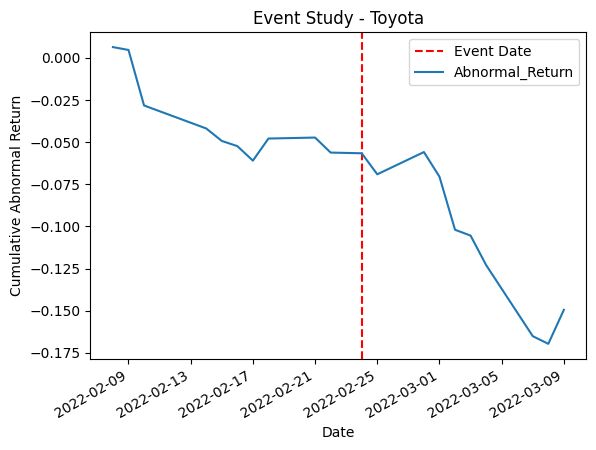

In [ ]:
plot_cumulative_abnormal_returns(event_window, "Toyota")

## Ford

In [ ]:
ford_df = prepare_stock_data('F', start_date, end_date)
ford_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,9.669353,9.693678,9.547726,9.614621,20602200,0.0,0.0,2015-05-01,NaN
1,9.614621,9.657190,9.578133,9.596376,15078700,0.0,0.0,2015-05-04,-0.001899
2,9.590297,9.620703,9.438263,9.444344,32248900,0.0,0.0,2015-05-05,-0.015970
3,9.492993,9.523400,9.365285,9.413936,26381200,0.0,0.0,2015-05-06,-0.003225
4,9.401775,9.462589,9.207172,9.432182,26996600,0.0,0.0,2015-05-07,0.001936
...,...,...,...,...,...,...,...,...,...
2358,10.536836,10.645361,10.487506,10.546701,35184800,0.0,0.0,2024-09-13,0.006570
2359,10.596032,10.773619,10.566434,10.655228,34802400,0.0,0.0,2024-09-16,0.010237
2360,10.744022,10.990671,10.674960,10.753887,52068600,0.0,0.0,2024-09-17,0.009217
2361,10.783485,11.109062,10.773619,10.832814,55017300,0.0,0.0,2024-09-18,0.007313


In [ ]:
df_merge_ford = pd.merge(ford_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_ford['date'] = pd.to_datetime(df_merge_ford['date'])
df_merge_ford

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,9.614621,9.657190,9.578133,9.596376,15078700,0.0,0.0,2015-05-04,-0.001899,0.002936
1,9.590297,9.620703,9.438263,9.444344,32248900,0.0,0.0,2015-05-05,-0.015970,-0.011908
2,9.492993,9.523400,9.365285,9.413936,26381200,0.0,0.0,2015-05-06,-0.003225,-0.004466
3,9.401775,9.462589,9.207172,9.432182,26996600,0.0,0.0,2015-05-07,0.001936,0.003767
4,9.499078,9.553810,9.480834,9.529485,21336800,0.0,0.0,2015-05-08,0.010263,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,10.536836,10.645361,10.487506,10.546701,35184800,0.0,0.0,2024-09-13,0.006570,0.005393
2358,10.596032,10.773619,10.566434,10.655228,34802400,0.0,0.0,2024-09-16,0.010237,0.001256
2359,10.744022,10.990671,10.674960,10.753887,52068600,0.0,0.0,2024-09-17,0.009217,0.000265
2360,10.783485,11.109062,10.773619,10.832814,55017300,0.0,0.0,2024-09-18,0.007313,-0.002901


In [ ]:
event_window_ford = get_event_window(df_merge_ford,event_date)
print(len(event_window_ford))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_ford = get_estimation_window(df_merge_ford,event_date)
print(len(estimation_window_ford))

20
120


In [ ]:
event_window_ford = calculate_abnormal_returns(event_window_ford, estimation_window_ford)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

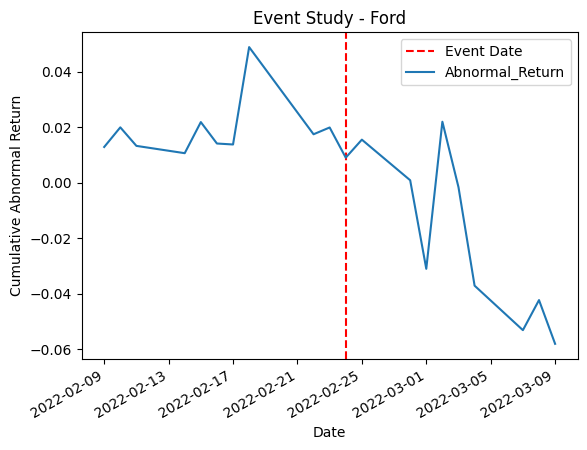

In [ ]:
plot_cumulative_abnormal_returns(event_window_ford, "Ford")

## General Motors

In [ ]:
gm_df = prepare_stock_data('GM', start_date, end_date)
gm_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,27.722573,27.959049,27.438807,27.919634,15307400,0.0,0.0,2015-05-01,NaN
1,27.982685,28.156100,27.903862,27.903862,12020100,0.0,0.0,2015-05-04,-0.000565
2,27.903873,27.998461,27.580692,27.596455,11068100,0.0,0.0,2015-05-05,-0.011078
3,27.698922,27.769864,27.233858,27.407272,13076200,0.0,0.0,2015-05-06,-0.006879
4,27.304804,27.612219,27.233862,27.493984,14033700,0.0,0.0,2015-05-07,0.003159
...,...,...,...,...,...,...,...,...,...
2358,46.310001,47.049999,46.169998,46.299999,8986300,0.0,0.0,2024-09-13,0.003895
2359,46.450001,47.689999,46.450001,46.869999,9928000,0.0,0.0,2024-09-16,0.012236
2360,47.360001,48.180000,47.080002,47.520000,8941600,0.0,0.0,2024-09-17,0.013773
2361,47.720001,49.549999,47.700001,48.660000,14533800,0.0,0.0,2024-09-18,0.023707


In [ ]:
df_merge_gm = pd.merge(gm_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_gm['date'] = pd.to_datetime(df_merge_gm['date'])
df_merge_gm

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,27.982685,28.156100,27.903862,27.903862,12020100,0.0,0.0,2015-05-04,-0.000565,0.002936
1,27.903873,27.998461,27.580692,27.596455,11068100,0.0,0.0,2015-05-05,-0.011078,-0.011908
2,27.698922,27.769864,27.233858,27.407272,13076200,0.0,0.0,2015-05-06,-0.006879,-0.004466
3,27.304804,27.612219,27.233862,27.493984,14033700,0.0,0.0,2015-05-07,0.003159,0.003767
4,27.627992,27.951172,27.612227,27.840818,12787000,0.0,0.0,2015-05-08,0.012536,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,46.310001,47.049999,46.169998,46.299999,8986300,0.0,0.0,2024-09-13,0.003895,0.005393
2358,46.450001,47.689999,46.450001,46.869999,9928000,0.0,0.0,2024-09-16,0.012236,0.001256
2359,47.360001,48.180000,47.080002,47.520000,8941600,0.0,0.0,2024-09-17,0.013773,0.000265
2360,47.720001,49.549999,47.700001,48.660000,14533800,0.0,0.0,2024-09-18,0.023707,-0.002901


In [ ]:
event_window_gm = get_event_window(df_merge_gm,event_date)
print(len(event_window_gm))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_gm = get_estimation_window(df_merge_gm,event_date)
print(len(estimation_window_gm))

20
120


In [ ]:
event_window_gm = calculate_abnormal_returns(event_window_gm, estimation_window_gm)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

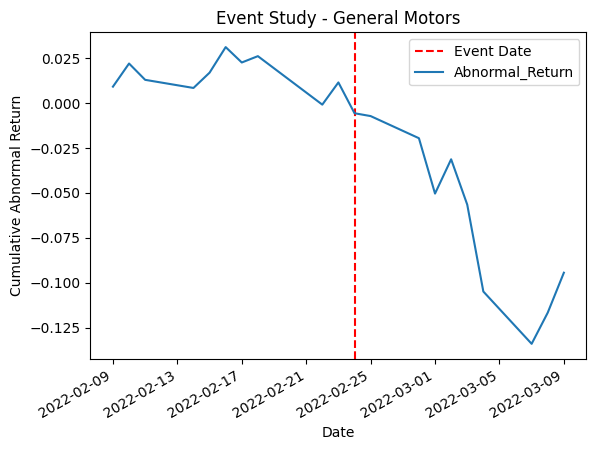

In [ ]:
plot_cumulative_abnormal_returns(event_window_gm, "General Motors")

## Volkswagen

In [ ]:
vow_df = prepare_stock_data('VOW.DE', start_date, end_date)
vow_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,141.058893,141.705672,138.132999,140.104126,50799,0.0,0.0,2015-05-04,NaN
1,139.826940,142.845227,138.317796,138.656586,75494,0.0,0.0,2015-05-05,-0.010386
2,139.411851,140.293005,134.093432,136.957199,103595,4.8,0.0,2015-05-06,-0.012332
3,135.635475,140.041267,135.635475,138.845413,92932,0.0,0.0,2015-05-07,0.013693
4,140.733635,142.275660,138.751022,141.835083,97421,0.0,0.0,2015-05-08,0.021304
...,...,...,...,...,...,...,...,...,...
2385,96.400002,99.400002,96.400002,98.750000,71093,0.0,0.0,2024-09-13,0.027722
2386,98.949997,98.949997,97.000000,97.250000,42218,0.0,0.0,2024-09-16,-0.015306
2387,97.449997,99.300003,97.099998,98.400002,45146,0.0,0.0,2024-09-17,0.011756
2388,98.699997,98.750000,98.050003,98.400002,52052,0.0,0.0,2024-09-18,0.000000


In [ ]:
dax_index_data = prepare_market_data("^GDAXI",start_date, end_date)
dax_index_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Market Return
0,11506.839844,11656.889648,11411.769531,11619.849609,80328700,0.0,0.0,2015-05-04,NaN
1,11576.120117,11751.219727,11322.620117,11327.679688,121580000,0.0,0.0,2015-05-05,-0.025466
2,11377.580078,11457.929688,11239.860352,11350.150391,101726700,0.0,0.0,2015-05-06,0.001982
3,11265.129883,11437.570312,11167.549805,11407.969727,119253400,0.0,0.0,2015-05-07,0.005081
4,11483.070312,11710.410156,11415.290039,11709.730469,111159500,0.0,0.0,2015-05-08,0.026108
...,...,...,...,...,...,...,...,...,...
2380,18546.220703,18722.189453,18542.230469,18699.400391,69687600,0.0,0.0,2024-09-13,0.009727
2381,18621.779297,18672.230469,18599.529297,18633.109375,51208600,0.0,0.0,2024-09-16,-0.003551
2382,18686.759766,18805.089844,18671.640625,18726.080078,60260500,0.0,0.0,2024-09-17,0.004977
2383,18729.640625,18756.529297,18695.369141,18711.490234,56152800,0.0,0.0,2024-09-18,-0.000779


In [ ]:
df_merge_vow = pd.merge(vow_df, dax_index_data[['date','Market Return']] ,left_on='date',right_on='date', how='left').dropna().reset_index(drop=True)
df_merge_vow['date'] = pd.to_datetime(df_merge_vow['date'])
df_merge_vow

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,139.826940,142.845227,138.317796,138.656586,75494,0.0,0.0,2015-05-05,-0.010386,-0.025466
1,139.411851,140.293005,134.093432,136.957199,103595,4.8,0.0,2015-05-06,-0.012332,0.001982
2,135.635475,140.041267,135.635475,138.845413,92932,0.0,0.0,2015-05-07,0.013693,0.005081
3,140.733635,142.275660,138.751022,141.835083,97421,0.0,0.0,2015-05-08,0.021304,0.026108
4,141.016862,141.992433,140.890984,141.835083,81298,0.0,0.0,2015-05-11,0.000000,-0.003112
...,...,...,...,...,...,...,...,...,...,...
2379,96.400002,99.400002,96.400002,98.750000,71093,0.0,0.0,2024-09-13,0.027722,0.009727
2380,98.949997,98.949997,97.000000,97.250000,42218,0.0,0.0,2024-09-16,-0.015306,-0.003551
2381,97.449997,99.300003,97.099998,98.400002,45146,0.0,0.0,2024-09-17,0.011756,0.004977
2382,98.699997,98.750000,98.050003,98.400002,52052,0.0,0.0,2024-09-18,0.000000,-0.000779


In [ ]:
event_window_vow = get_event_window(df_merge_vow,event_date)
print(len(event_window_vow))
event_estimation_vow = get_estimation_window(df_merge_vow,event_date)
print(len(event_estimation_vow))

20
120


In [ ]:
event_window_vow = calculate_abnormal_returns(event_window_vow, event_estimation_vow)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

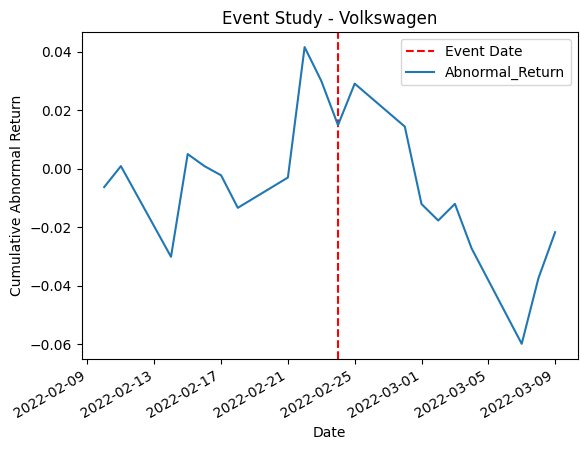

In [ ]:
plot_cumulative_abnormal_returns(event_window_vow, "Volkswagen")

## BMW

In [ ]:
bmw_df = prepare_stock_data('BMW.DE', start_date, end_date)
bmw_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,63.474028,64.156545,62.465093,63.355331,1417230,0.0,0.0,2015-05-04,NaN
1,63.325652,64.868736,62.910209,63.206955,2045175,0.0,0.0,2015-05-05,-0.002345
2,63.206957,64.364265,60.239494,61.782574,3585784,0.0,0.0,2015-05-06,-0.022793
3,61.485823,62.465086,60.536236,62.079315,2172455,0.0,0.0,2015-05-07,0.004791
4,62.791521,64.987442,62.079327,64.987442,2848869,0.0,0.0,2015-05-08,0.045781
...,...,...,...,...,...,...,...,...,...
2385,71.559998,73.580002,71.519997,73.320000,1291278,0.0,0.0,2024-09-13,0.027096
2386,73.099998,73.260002,72.480003,72.519997,957469,0.0,0.0,2024-09-16,-0.010971
2387,72.580002,73.720001,72.459999,72.919998,981218,0.0,0.0,2024-09-17,0.005501
2388,73.239998,75.000000,73.019997,74.519997,1624277,0.0,0.0,2024-09-18,0.021705


In [ ]:
df_merge_bmw = pd.merge(bmw_df, dax_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_bmw['date'] = pd.to_datetime(df_merge_bmw['date'])
df_merge_bmw

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,63.325652,64.868736,62.910209,63.206955,2045175,0.0,0.0,2015-05-05,-0.002345,-0.025466
1,63.206957,64.364265,60.239494,61.782574,3585784,0.0,0.0,2015-05-06,-0.022793,0.001982
2,61.485823,62.465086,60.536236,62.079315,2172455,0.0,0.0,2015-05-07,0.004791,0.005081
3,62.791521,64.987442,62.079327,64.987442,2848869,0.0,0.0,2015-05-08,0.045781,0.026108
4,65.224831,65.284179,64.215891,64.868736,1548211,0.0,0.0,2015-05-11,-0.001828,-0.003112
...,...,...,...,...,...,...,...,...,...,...
2379,71.559998,73.580002,71.519997,73.320000,1291278,0.0,0.0,2024-09-13,0.027096,0.009727
2380,73.099998,73.260002,72.480003,72.519997,957469,0.0,0.0,2024-09-16,-0.010971,-0.003551
2381,72.580002,73.720001,72.459999,72.919998,981218,0.0,0.0,2024-09-17,0.005501,0.004977
2382,73.239998,75.000000,73.019997,74.519997,1624277,0.0,0.0,2024-09-18,0.021705,-0.000779


In [ ]:
event_window_bmw = get_event_window(df_merge_bmw,event_date)
print(len(event_window_bmw))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_bmw = get_estimation_window(df_merge_bmw,event_date)
print(len(estimation_window_bmw))

20
120


In [ ]:
event_window_bmw = calculate_abnormal_returns(event_window_bmw, estimation_window_bmw)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

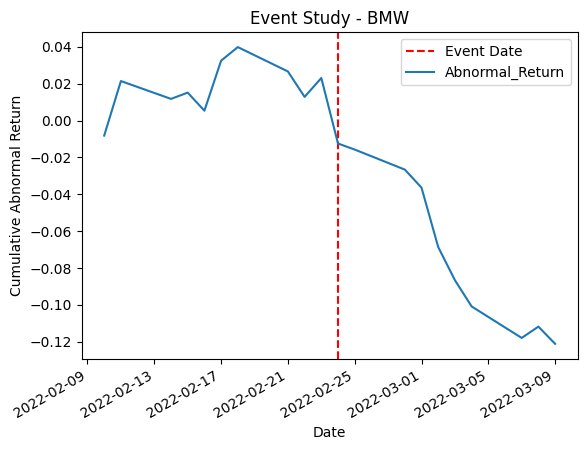

In [ ]:
plot_cumulative_abnormal_returns(event_window_bmw, "BMW")

## Tesla

In [ ]:
tesla_df = prepare_stock_data('TSLA', start_date, end_date)
tesla_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,15.329333,15.451333,14.694000,15.068667,79225500,0.0,0.0,2015-05-01,NaN
1,15.212000,15.648667,15.140667,15.367333,66519000,0.0,0.0,2015-05-04,0.019626
2,15.850667,15.966667,15.275333,15.530000,86953500,0.0,0.0,2015-05-05,0.010530
3,15.606667,15.631333,15.213333,15.362000,79063500,0.0,0.0,2015-05-06,-0.010877
4,14.733333,15.832000,14.683333,15.786667,141838500,0.0,0.0,2015-05-07,0.027269
...,...,...,...,...,...,...,...,...,...
2358,228.000000,232.669998,226.320007,230.289993,59515100,0.0,0.0,2024-09-13,0.002086
2359,229.300003,229.960007,223.529999,226.779999,54323000,0.0,0.0,2024-09-16,-0.015359
2360,229.449997,234.570007,226.550003,227.869995,66761600,0.0,0.0,2024-09-17,0.004795
2361,230.089996,235.679993,226.880005,227.199997,78010200,0.0,0.0,2024-09-18,-0.002945


In [ ]:
sp_index_data = prepare_market_data("^GSPC",start_date, end_date)
sp_index_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Market Return
0,2087.379883,2108.409912,2087.379883,2108.290039,3379390000,0.0,0.0,2015-05-01,NaN
1,2110.229980,2120.949951,2110.229980,2114.489990,3091580000,0.0,0.0,2015-05-04,0.002936
2,2112.629883,2115.239990,2088.459961,2089.459961,3793950000,0.0,0.0,2015-05-05,-0.011908
3,2091.260010,2098.419922,2067.929932,2080.149902,3792210000,0.0,0.0,2015-05-06,-0.004466
4,2079.959961,2092.899902,2074.989990,2088.000000,3676640000,0.0,0.0,2015-05-07,0.003767
...,...,...,...,...,...,...,...,...,...
2358,5603.339844,5636.270020,5601.649902,5626.020020,3500790000,0.0,0.0,2024-09-13,0.005393
2359,5615.209961,5636.049805,5604.529785,5633.089844,3437070000,0.0,0.0,2024-09-16,0.001256
2360,5655.509766,5670.810059,5614.049805,5634.580078,3443600000,0.0,0.0,2024-09-17,0.000265
2361,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,0.0,0.0,2024-09-18,-0.002901


In [ ]:
df_merge_tesla = pd.merge(tesla_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_tesla['date'] = pd.to_datetime(df_merge_tesla['date'])
df_merge_tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,15.212000,15.648667,15.140667,15.367333,66519000,0.0,0.0,2015-05-04,0.019626,0.002936
1,15.850667,15.966667,15.275333,15.530000,86953500,0.0,0.0,2015-05-05,0.010530,-0.011908
2,15.606667,15.631333,15.213333,15.362000,79063500,0.0,0.0,2015-05-06,-0.010877,-0.004466
3,14.733333,15.832000,14.683333,15.786667,141838500,0.0,0.0,2015-05-07,0.027269,0.003767
4,15.732667,15.894000,15.580000,15.774000,70023000,0.0,0.0,2015-05-08,-0.000803,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,228.000000,232.669998,226.320007,230.289993,59515100,0.0,0.0,2024-09-13,0.002086,0.005393
2358,229.300003,229.960007,223.529999,226.779999,54323000,0.0,0.0,2024-09-16,-0.015359,0.001256
2359,229.449997,234.570007,226.550003,227.869995,66761600,0.0,0.0,2024-09-17,0.004795,0.000265
2360,230.089996,235.679993,226.880005,227.199997,78010200,0.0,0.0,2024-09-18,-0.002945,-0.002901


In [ ]:
df_merge_tesla[df_merge_tesla['date'] == event_date]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
1716,233.463333,267.493347,233.333328,266.92334,135322200,0.0,0.0,2022-02-24,0.046954,0.014846


In [ ]:
event_window_tesla = get_event_window(df_merge_tesla,event_date)
print(len(event_window_tesla))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_tesla = get_estimation_window(df_merge_tesla,event_date)
print(len(estimation_window_tesla))

20
120


In [ ]:
event_window_tesla = calculate_abnormal_returns(event_window_tesla, estimation_window_tesla)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

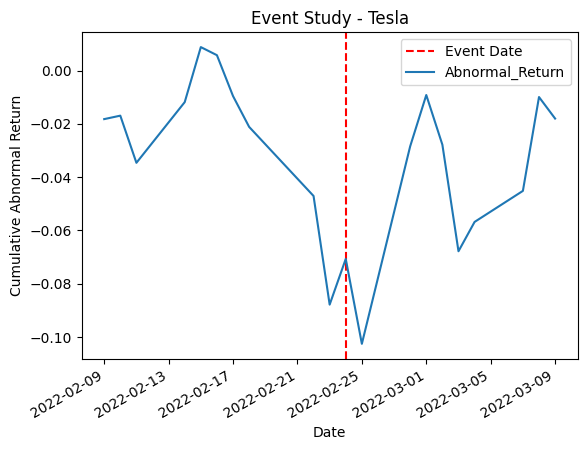

In [ ]:
plot_cumulative_abnormal_returns(event_window_tesla, "Tesla")

## Honda

In [ ]:
honda_df = prepare_stock_data('7267.T', start_date, end_date)

In [ ]:
df_merge_honda = pd.merge(honda_df, index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_honda['date'] = pd.to_datetime(df_merge_honda['date'])
df_merge_honda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,973.040829,982.159396,967.041869,981.199524,15477600,0.0,0.0,2015-05-07,-0.002564,-0.012345
1,991.037804,1012.274329,989.838029,1003.875732,18307500,0.0,0.0,2015-05-08,0.022848,0.004510
2,1019.833033,1026.311973,1010.234663,1010.354614,10732500,0.0,0.0,2015-05-11,0.006433,0.012396
3,1007.834684,1009.514437,986.358177,1000.875854,11258700,0.0,0.0,2015-05-12,-0.009426,0.000200
4,995.596702,1006.754872,988.157893,1005.675049,9603000,0.0,0.0,2015-05-13,0.004784,0.007102
...,...,...,...,...,...,...,...,...,...,...
2289,1443.947335,1469.889440,1439.542072,1462.057861,22186700,0.0,0.0,2024-09-12,0.035438,0.033501
2290,1462.057866,1466.463129,1439.052603,1441.010498,16136200,0.0,0.0,2024-09-13,-0.014500,-0.006852
2291,1444.436820,1461.568399,1411.152610,1426.326294,18645900,0.0,0.0,2024-09-17,-0.010242,-0.010402
2292,1451.289441,1464.505230,1445.905230,1462.057861,12664600,0.0,0.0,2024-09-18,0.024743,0.004876


In [ ]:
df_merge_honda[df_merge_honda['date'] == event_date]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
1662,1068.904,1074.561189,1045.084448,1054.314575,15165600,0.0,0.0,2022-02-24,-0.01207,-0.018268


In [ ]:
event_window_honda = get_event_window(df_merge_honda,event_date)
print(len(event_window_honda))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_honda = get_estimation_window(df_merge_honda,event_date)
print(len(estimation_window_honda))

20
120


In [ ]:
event_window_honda = calculate_abnormal_returns(event_window_honda, estimation_window_honda)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

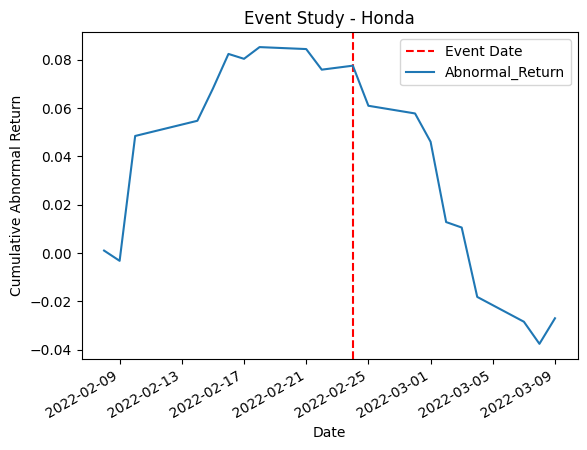

In [ ]:
plot_cumulative_abnormal_returns(event_window_honda, "Honda")

## Nissan

In [ ]:
nissan_df = prepare_stock_data('7201.T', start_date, end_date)

In [ ]:
df_merge_nissan = pd.merge(nissan_df, index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_nissan['date'] = pd.to_datetime(df_merge_nissan['date'])
df_merge_nissan

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,930.822226,941.198857,921.214235,940.045898,11924600,0.0,0.0,2015-05-07,-0.015819,-0.012345
1,940.045878,952.728427,935.434042,949.653870,9451600,0.0,0.0,2015-05-08,0.010169,0.004510
2,970.022663,984.626807,963.104910,965.410828,9336200,0.0,0.0,2015-05-11,0.016456,0.012396
3,968.485356,970.022635,956.955769,967.332397,6814200,0.0,0.0,2015-05-12,0.001988,0.000200
4,955.034208,961.183321,949.269414,958.108765,10287800,0.0,0.0,2015-05-13,-0.009581,0.007102
...,...,...,...,...,...,...,...,...,...,...
2289,396.100006,398.399994,390.399994,393.899994,30000700,0.0,0.0,2024-09-12,0.014834,0.033501
2290,394.100006,395.399994,390.100006,390.799988,20001300,0.0,0.0,2024-09-13,-0.007901,-0.006852
2291,390.200012,391.799988,378.200012,382.700012,39234100,0.0,0.0,2024-09-17,-0.020944,-0.010402
2292,384.899994,390.500000,383.000000,389.799988,32823100,0.0,0.0,2024-09-18,0.018382,0.004876


In [ ]:
event_window_nissan = get_event_window(df_merge_nissan,event_date)
print(len(event_window_nissan))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_nissan = get_estimation_window(df_merge_nissan,event_date)
print(len(estimation_window_nissan))

20
120


In [ ]:
event_window_nissan = calculate_abnormal_returns(event_window_nissan, estimation_window_nissan)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

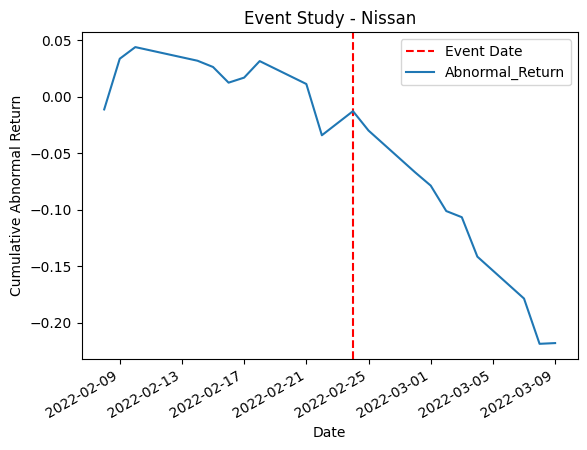

In [ ]:
plot_cumulative_abnormal_returns(event_window_nissan, "Nissan")

## BYD

In [ ]:
byd_df = prepare_stock_data('1211.HK', start_date, end_date)

In [ ]:
hang_seng_index = prepare_market_data("^HSI",start_date, end_date)

In [ ]:
df_merge_byd = pd.merge(byd_df, hang_seng_index[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_byd['date'] = pd.to_datetime(df_merge_byd['date'])
df_merge_byd

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,47.069360,47.165028,44.629791,45.395145,5795199,0.0,0.0,2015-05-05,-0.003156,-0.013181
1,44.773295,46.112668,44.486287,44.821129,5312264,0.0,0.0,2015-05-06,-0.012726,-0.004138
2,43.864436,44.677628,43.242587,43.529594,5240500,0.0,0.0,2015-05-07,-0.029239,-0.012778
3,44.294949,45.395149,43.625263,45.012470,6126095,0.0,0.0,2015-05-08,0.033499,0.010475
4,44.964642,47.308544,44.916808,46.925865,10098022,0.0,0.0,2015-05-11,0.041629,0.005095
...,...,...,...,...,...,...,...,...,...,...
2304,240.399994,241.800003,238.800003,238.800003,3823721,0.0,0.0,2024-09-12,-0.005846,0.007667
2305,240.000000,241.600006,238.600006,239.800003,3421356,0.0,0.0,2024-09-13,0.004179,0.007437
2306,237.000000,240.600006,236.600006,240.000000,1908136,0.0,0.0,2024-09-16,0.000834,0.003048
2307,240.000000,244.399994,239.199997,242.800003,4115373,0.0,0.0,2024-09-17,0.011599,0.013563


In [ ]:
event_window_byd = get_event_window(df_merge_byd,event_date)
print(len(event_window_byd))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_byd = get_estimation_window(df_merge_byd,event_date)
print(len(estimation_window_byd))

20
120


In [ ]:
event_window_byd = calculate_abnormal_returns(event_window_byd, estimation_window_byd)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

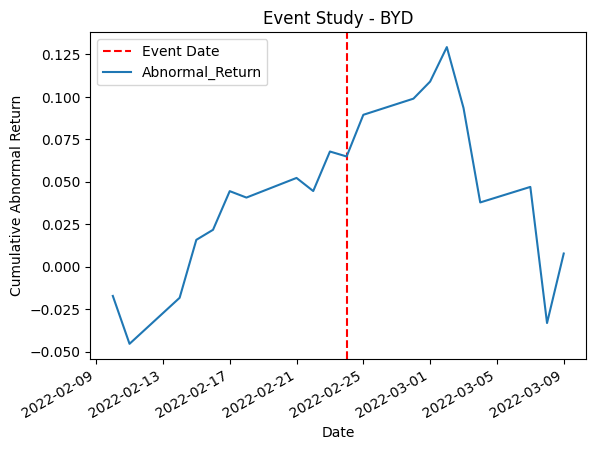

In [ ]:
plot_cumulative_abnormal_returns(event_window_byd, "BYD")

## Mazda

In [ ]:
mazda_df = prepare_stock_data('7261.T', start_date, end_date)

In [ ]:
df_merge_mazda = pd.merge(mazda_df, index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_mazda['date'] = pd.to_datetime(df_merge_mazda['date'])
df_merge_mazda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,1851.345695,1890.628450,1840.844364,1879.349243,10056700,0.0,0.0,2015-05-07,0.020490,-0.012345
1,1887.127813,1924.854812,1875.848607,1912.797729,8511300,0.0,0.0,2015-05-08,0.017641,0.004510
2,1969.583142,1986.696423,1944.691095,1945.857910,10958400,0.0,0.0,2015-05-11,0.017136,0.012396
3,1929.910872,1952.469282,1905.796710,1951.691406,6043800,0.0,0.0,2015-05-12,0.002993,0.000200
4,1944.690985,1962.582142,1926.410890,1960.637451,5582300,0.0,0.0,2015-05-13,0.004573,0.007102
...,...,...,...,...,...,...,...,...,...,...
2289,1061.452635,1061.941558,1040.428930,1050.207397,6637100,0.0,0.0,2024-09-12,0.016429,0.033501
2290,1039.939981,1050.207372,1020.871970,1024.294434,6083100,0.0,0.0,2024-09-13,-0.024984,-0.006852
2291,1016.960579,1026.739046,996.425798,1014.027039,8943300,0.0,0.0,2024-09-17,-0.010074,-0.010402
2292,1036.028588,1054.607676,1027.227968,1050.696289,6703300,0.0,0.0,2024-09-18,0.035524,0.004876


In [ ]:
event_window_mazda = get_event_window(df_merge_mazda,event_date)
print(len(event_window_mazda))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_mazda = get_estimation_window(df_merge_mazda,event_date)
print(len(estimation_window_mazda))

20
120


In [ ]:
event_window_mazda = calculate_abnormal_returns(event_window_mazda, estimation_window_mazda)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

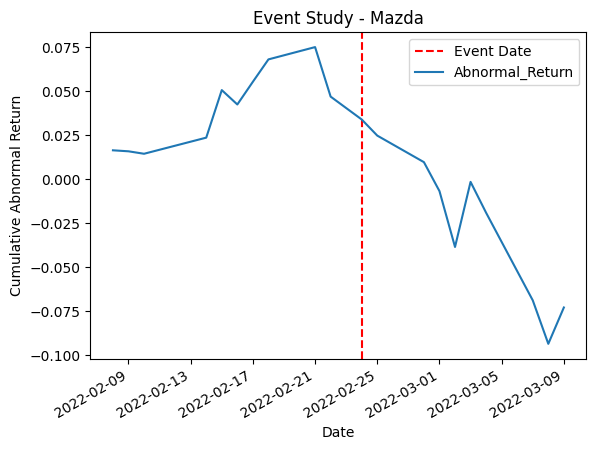

In [ ]:
plot_cumulative_abnormal_returns(event_window_mazda, "Mazda")

## Apple

In [ ]:
apple_df = prepare_stock_data('AAPL', start_date, end_date)

In [ ]:
df_merge_apple = pd.merge(apple_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_apple['date'] = pd.to_datetime(df_merge_apple['date'])
df_merge_apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,28.952732,29.191957,28.675500,28.773872,203953200,0.00,0.0,2015-05-04,-0.001940,0.002936
1,28.650910,28.717983,28.121043,28.125515,197085600,0.00,0.0,2015-05-05,-0.022791,-0.011908
2,28.295428,28.337908,27.579995,27.948891,288564000,0.00,0.0,2015-05-06,-0.006300,-0.004466
3,28.011750,28.305855,27.843369,28.121759,175763600,0.13,0.0,2015-05-07,0.006166,0.003767
4,28.440559,28.651596,28.312590,28.651596,222201600,0.00,0.0,2015-05-08,0.018666,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,223.334293,223.793779,221.666130,222.255478,36766600,0.00,0.0,2024-09-13,-0.001213,0.005393
2358,216.302020,216.981280,213.684904,216.082275,59357400,0.00,0.0,2024-09-16,-0.028168,0.001256
2359,215.512892,216.661622,214.264266,216.551743,45519300,0.00,0.0,2024-09-17,0.002170,0.000265
2360,217.310915,222.465248,217.300917,220.447464,59894900,0.00,0.0,2024-09-18,0.017830,-0.002901


In [ ]:
#event_date = pd.to_datetime('2022-11-10')
#event_date = pd.to_datetime('2024-06-03')

df_merge_apple[df_merge_apple['date'] == event_date]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
1716,150.312159,160.429517,149.740778,160.321152,141147500,0.0,0.0,2022-02-24,0.016542,0.014846


In [ ]:
event_window_apple = get_event_window(df_merge_apple,event_date)
print(len(event_window_apple))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_apple = get_estimation_window(df_merge_apple,event_date)
print(len(estimation_window_apple))

20
120


In [ ]:
event_window_apple = calculate_abnormal_returns(event_window_apple, estimation_window_apple)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

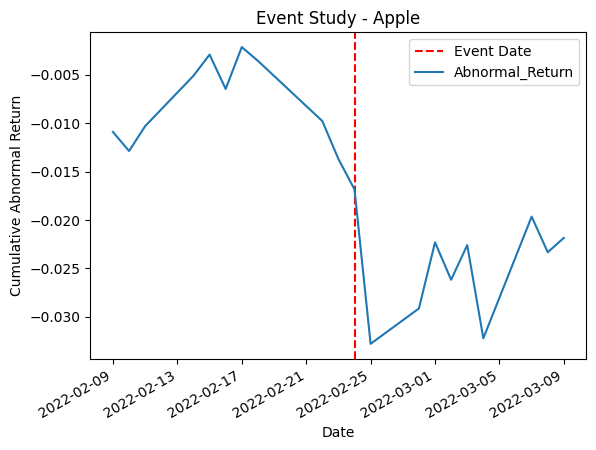

In [ ]:
plot_cumulative_abnormal_returns(event_window_apple, "Apple")

## Amazon

In [ ]:
amazon_df = prepare_stock_data('AMZN', start_date, end_date)

In [ ]:
df_merge_amazon = pd.merge(amazon_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_amazon['date'] = pd.to_datetime(df_merge_amazon['date'])
df_merge_amazon

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,21.240000,21.488501,21.121000,21.152000,45408000,0.0,0.0,2015-05-04,0.000402,0.002936
1,21.142500,21.375500,21.051001,21.059500,57128000,0.0,0.0,2015-05-05,-0.004383,-0.011908
2,21.071501,21.136000,20.727501,20.955000,51050000,0.0,0.0,2015-05-06,-0.004974,-0.004466
3,21.207500,21.424999,21.142500,21.344000,55322000,0.0,0.0,2015-05-07,0.018393,0.003767
4,21.537500,21.760000,21.508499,21.684500,58176000,0.0,0.0,2015-05-08,0.015827,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,187.000000,188.500000,185.910004,186.490005,26495400,0.0,0.0,2024-09-13,-0.002731,0.005393
2358,185.289993,185.809998,183.360001,184.889999,26065500,0.0,0.0,2024-09-16,-0.008617,0.001256
2359,186.850006,189.449997,186.139999,186.880005,26091700,0.0,0.0,2024-09-17,0.010706,0.000265
2360,186.449997,188.800003,185.059998,186.429993,34448100,0.0,0.0,2024-09-18,-0.002411,-0.002901


In [ ]:
#event_date = pd.to_datetime('2022-11-10')

df_merge_amazon[df_merge_amazon['date'] == event_date]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
1716,139.837494,151.748993,139.5,151.358002,100786000,0.0,0.0,2022-02-24,0.044108,0.014846


In [ ]:
event_window_amazon = get_event_window(df_merge_amazon, event_date)
print(len(event_window_amazon))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_amazon = get_estimation_window(df_merge_amazon, event_date)
print(len(estimation_window))

20
120


In [ ]:
event_window_amazon = calculate_abnormal_returns(event_window_amazon, estimation_window_amazon)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

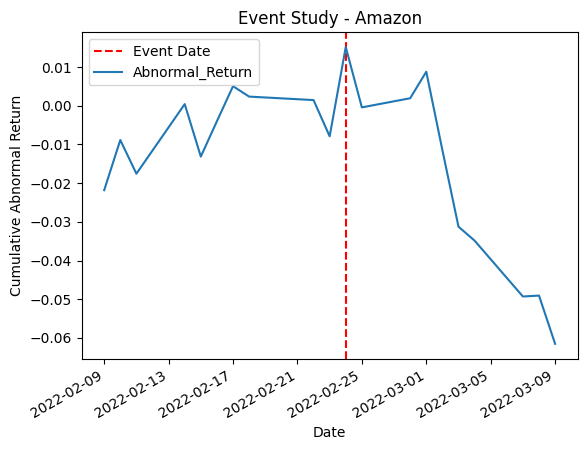

In [ ]:
plot_cumulative_abnormal_returns(event_window_amazon, "Amazon")

## Google

In [ ]:
google_df = prepare_stock_data('GOOGL', start_date, end_date)

In [ ]:
df_merge_google = pd.merge(google_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_google['date'] = pd.to_datetime(df_merge_google['date'])
df_merge_google

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,27.481451,27.765747,27.301895,27.573723,35260000,0.0,0.0,2015-05-04,0.003043,0.002936
1,27.440052,27.562251,27.051514,27.084932,28528000,0.0,0.0,2015-05-05,-0.017886,-0.011908
2,27.064982,27.129324,26.546266,26.687916,39034000,0.0,0.0,2015-05-06,-0.014767,-0.004466
3,26.728814,27.192666,26.606617,27.035055,31844000,0.0,0.0,2015-05-07,0.012923,0.003767
4,27.375714,27.571727,27.333818,27.379704,28226000,0.0,0.0,2015-05-08,0.012668,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,155.429993,158.380005,155.210007,157.460007,29591200,0.0,0.0,2024-09-13,0.017748,0.005393
2358,157.309998,158.250000,156.600006,158.059998,18379800,0.0,0.0,2024-09-16,0.003803,0.001256
2359,159.020004,160.550003,158.380005,159.320007,20715600,0.0,0.0,2024-09-17,0.007940,0.000265
2360,159.860001,160.500000,158.600006,159.809998,23677300,0.0,0.0,2024-09-18,0.003071,-0.002901


In [ ]:
event_window_google = get_event_window(df_merge_google, event_date)
print(len(event_window_google))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_google = get_estimation_window(df_merge_google, event_date)
print(len(estimation_window_google))

20
120


In [ ]:
event_window_google = calculate_abnormal_returns(event_window_google, estimation_window_google)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

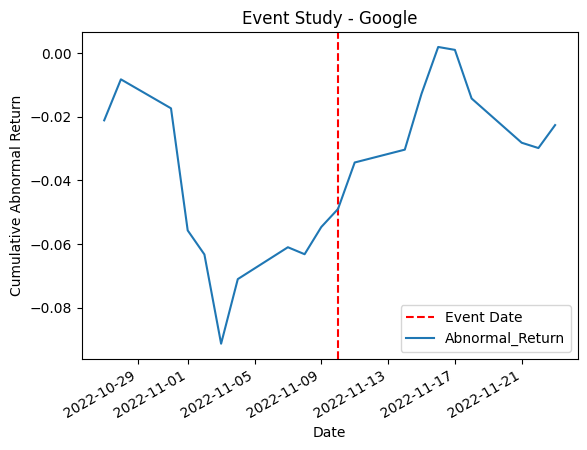

In [ ]:
plot_cumulative_abnormal_returns(event_window_google, "Google")

## Microsoft

In [ ]:
msft_df = prepare_stock_data('MSFT', start_date, end_date)

In [ ]:
df_merge_msft = pd.merge(msft_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_msft['date'] = pd.to_datetime(df_merge_msft['date'])
df_merge_msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,41.914294,42.347562,41.749654,41.801647,34039500,0.0,0.0,2015-05-04,-0.008669,0.002936
1,41.437713,41.732335,40.995781,41.247074,50369200,0.0,0.0,2015-05-05,-0.013356,-0.011908
2,41.221064,41.394372,39.877936,40.103233,52433000,0.0,0.0,2015-05-06,-0.028123,-0.004466
3,40.094564,40.805123,39.999245,40.467175,32971700,0.0,0.0,2015-05-07,0.009034,0.003767
4,41.203737,41.576347,41.177742,41.377045,35364900,0.0,0.0,2015-05-08,0.022235,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,425.829987,431.829987,425.459991,430.589996,15874600,0.0,0.0,2024-09-13,0.008372,0.005393
2358,430.600006,433.529999,428.220001,431.339996,13834700,0.0,0.0,2024-09-16,0.001740,0.001256
2359,440.230011,441.850006,432.269989,435.149994,18874200,0.0,0.0,2024-09-17,0.008794,0.000265
2360,435.000000,436.029999,430.410004,430.809998,18898000,0.0,0.0,2024-09-18,-0.010024,-0.002901


In [ ]:
event_window_msft = get_event_window(df_merge_msft, event_date)
print(len(event_window_msft))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_msft = get_estimation_window(df_merge_msft, event_date)
print(len(estimation_window_msft))

20
120


In [ ]:
event_window_msft = calculate_abnormal_returns(event_window_msft, estimation_window_msft)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

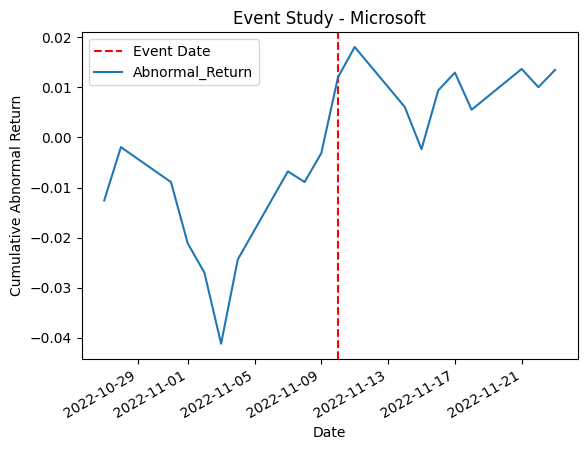

In [ ]:
plot_cumulative_abnormal_returns(event_window_msft, "Microsoft")

In [ ]:
tesla_df = prepare_stock_data('TSLA', start_date, end_date)
tesla_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,15.329333,15.451333,14.694000,15.068667,79225500,0.0,0.0,2015-05-01,NaN
1,15.212000,15.648667,15.140667,15.367333,66519000,0.0,0.0,2015-05-04,0.019626
2,15.850667,15.966667,15.275333,15.530000,86953500,0.0,0.0,2015-05-05,0.010530
3,15.606667,15.631333,15.213333,15.362000,79063500,0.0,0.0,2015-05-06,-0.010877
4,14.733333,15.832000,14.683333,15.786667,141838500,0.0,0.0,2015-05-07,0.027269
...,...,...,...,...,...,...,...,...,...
2358,228.000000,232.669998,226.320007,230.289993,59515100,0.0,0.0,2024-09-13,0.002086
2359,229.300003,229.960007,223.529999,226.779999,54323000,0.0,0.0,2024-09-16,-0.015359
2360,229.449997,234.570007,226.550003,227.869995,66761600,0.0,0.0,2024-09-17,0.004795
2361,230.089996,235.679993,226.880005,227.199997,78010200,0.0,0.0,2024-09-18,-0.002945


In [ ]:
df_merge_tesla = pd.merge(tesla_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_tesla['date'] = pd.to_datetime(df_merge_tesla['date'])
df_merge_tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,15.212000,15.648667,15.140667,15.367333,66519000,0.0,0.0,2015-05-04,0.019626,0.002936
1,15.850667,15.966667,15.275333,15.530000,86953500,0.0,0.0,2015-05-05,0.010530,-0.011908
2,15.606667,15.631333,15.213333,15.362000,79063500,0.0,0.0,2015-05-06,-0.010877,-0.004466
3,14.733333,15.832000,14.683333,15.786667,141838500,0.0,0.0,2015-05-07,0.027269,0.003767
4,15.732667,15.894000,15.580000,15.774000,70023000,0.0,0.0,2015-05-08,-0.000803,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,228.000000,232.669998,226.320007,230.289993,59515100,0.0,0.0,2024-09-13,0.002086,0.005393
2358,229.300003,229.960007,223.529999,226.779999,54323000,0.0,0.0,2024-09-16,-0.015359,0.001256
2359,229.449997,234.570007,226.550003,227.869995,66761600,0.0,0.0,2024-09-17,0.004795,0.000265
2360,230.089996,235.679993,226.880005,227.199997,78010200,0.0,0.0,2024-09-18,-0.002945,-0.002901


In [ ]:
event_window_tesla = get_event_window(df_merge_tesla,event_date)
print(len(event_window_tesla))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_tesla = get_estimation_window(df_merge_tesla,event_date)
print(len(estimation_window_tesla))

20
120


In [ ]:
event_window_tesla = calculate_abnormal_returns(event_window_tesla, estimation_window_tesla)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

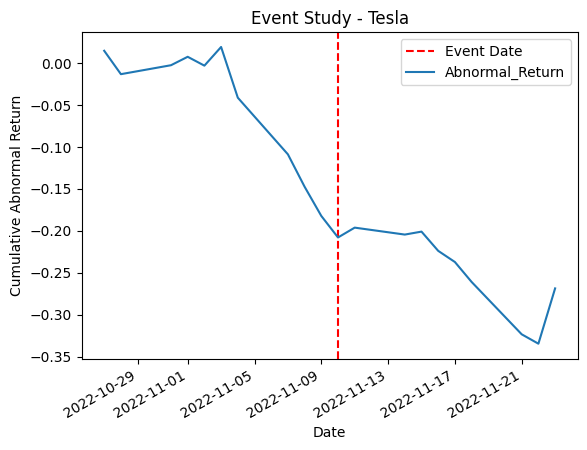

In [ ]:
plot_cumulative_abnormal_returns(event_window_tesla, "Tesla")

## Nvidia

In [ ]:
nvda_df = prepare_stock_data('NVDA', start_date, end_date)
nvda_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,0.539252,0.549854,0.536842,0.548167,256968000,0.0,0.0,2015-05-01,NaN
1,0.547685,0.551299,0.543107,0.544793,200720000,0.0,0.0,2015-05-04,-0.006173
2,0.542866,0.543589,0.528409,0.530818,292928000,0.0,0.0,2015-05-05,-0.025987
3,0.533710,0.538770,0.525517,0.532505,316484000,0.0,0.0,2015-05-06,0.003172
4,0.530336,0.543589,0.528650,0.541902,534564000,0.0,0.0,2015-05-07,0.017493
...,...,...,...,...,...,...,...,...,...
2358,119.080002,119.959999,117.599998,119.099998,238358300,0.0,0.0,2024-09-13,-0.000336
2359,116.790001,118.180000,114.360001,116.779999,248772300,0.0,0.0,2024-09-16,-0.019672
2360,118.169998,118.800003,114.830002,115.589996,231925900,0.0,0.0,2024-09-17,-0.010242
2361,115.889999,117.699997,113.220001,113.370003,310318900,0.0,0.0,2024-09-18,-0.019393


In [ ]:
df_merge_nvda = pd.merge(nvda_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_nvda['date'] = pd.to_datetime(df_merge_nvda['date'])
df_merge_nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,0.547685,0.551299,0.543107,0.544793,200720000,0.0,0.0,2015-05-04,-0.006173,0.002936
1,0.542866,0.543589,0.528409,0.530818,292928000,0.0,0.0,2015-05-05,-0.025987,-0.011908
2,0.533710,0.538770,0.525517,0.532505,316484000,0.0,0.0,2015-05-06,0.003172,-0.004466
3,0.530336,0.543589,0.528650,0.541902,534564000,0.0,0.0,2015-05-07,0.017493,0.003767
4,0.506241,0.526240,0.493712,0.501904,1146552000,0.0,0.0,2015-05-08,-0.076677,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,119.080002,119.959999,117.599998,119.099998,238358300,0.0,0.0,2024-09-13,-0.000336,0.005393
2358,116.790001,118.180000,114.360001,116.779999,248772300,0.0,0.0,2024-09-16,-0.019672,0.001256
2359,118.169998,118.800003,114.830002,115.589996,231925900,0.0,0.0,2024-09-17,-0.010242,0.000265
2360,115.889999,117.699997,113.220001,113.370003,310318900,0.0,0.0,2024-09-18,-0.019393,-0.002901


In [ ]:
event_window_nvda = get_event_window(df_merge_nvda,event_date)
print(len(event_window_nvda))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_nvda = get_estimation_window(df_merge_nvda,event_date)
print(len(estimation_window_nvda))

20
120


In [ ]:
event_window_nvda = calculate_abnormal_returns(event_window_nvda, estimation_window_nvda)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

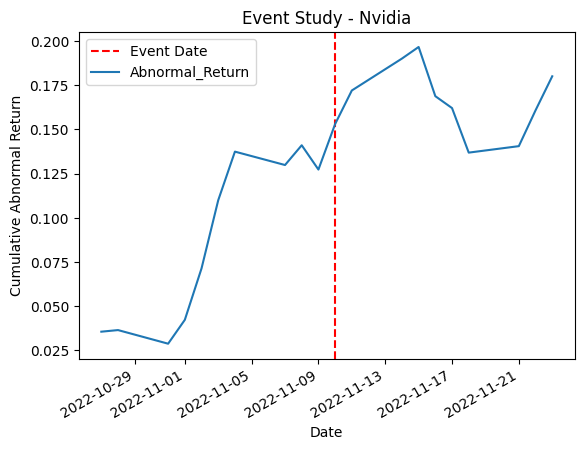

In [ ]:
plot_cumulative_abnormal_returns(event_window_nvda, "Nvidia")

## Tencent

In [ ]:
tencent_df = prepare_stock_data("0700.HK", start_date, end_date)
tencent_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,141.257993,142.675006,139.575297,139.929550,24186374,0.0,0.0,2015-05-04,NaN
1,140.372380,142.409329,137.892621,139.575317,21200652,0.0,0.0,2015-05-05,-0.002535
2,137.272661,140.992306,137.272661,138.158279,21188428,0.0,0.0,2015-05-06,-0.010204
3,137.272670,138.069733,134.438644,135.501404,21528958,0.0,0.0,2015-05-07,-0.019418
4,138.158291,139.929558,136.121342,136.387039,19643557,0.0,0.0,2015-05-08,0.006515
...,...,...,...,...,...,...,...,...,...
2308,371.000000,377.000000,369.600006,372.600006,13800366,0.0,0.0,2024-09-12,0.006462
2309,372.799988,376.799988,372.799988,374.799988,11013765,0.0,0.0,2024-09-13,0.005887
2310,372.600006,377.799988,370.399994,377.799988,7689238,0.0,0.0,2024-09-16,0.007972
2311,372.000000,381.399994,372.000000,380.000000,10147851,0.0,0.0,2024-09-17,0.005806


In [ ]:
hang_seng_index = prepare_market_data("^HSI",start_date, end_date)
hang_seng_index

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Market Return
0,28231.259766,28343.740234,28017.199219,28123.820312,1999728900,0.0,0.0,2015-05-04,NaN
1,28295.720703,28316.630859,27598.169922,27755.539062,2292680300,0.0,0.0,2015-05-05,-0.013181
2,27698.099609,28054.679688,27570.410156,27640.910156,2265508000,0.0,0.0,2015-05-06,-0.004138
3,27567.619141,27604.490234,27207.279297,27289.970703,1894753100,0.0,0.0,2015-05-07,-0.012778
4,27557.519531,27652.619141,27367.109375,27577.339844,1817614400,0.0,0.0,2015-05-08,0.010475
...,...,...,...,...,...,...,...,...,...
2306,17177.300781,17334.189453,17127.250000,17240.390625,2374153300,0.0,0.0,2024-09-12,0.007667
2307,17298.349609,17540.810547,17298.349609,17369.089844,2139977900,0.0,0.0,2024-09-13,0.007437
2308,17252.769531,17422.119141,17177.080078,17422.119141,1127924500,0.0,0.0,2024-09-16,0.003048
2309,17386.750000,17715.769531,17368.140625,17660.019531,1665721500,0.0,0.0,2024-09-17,0.013563


In [ ]:
df_merge_tencent = pd.merge(tencent_df, hang_seng_index[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_tencent['date'] = pd.to_datetime(df_merge_tencent['date'])
df_merge_tencent

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,140.372380,142.409329,137.892621,139.575317,21200652,0.0,0.0,2015-05-05,-0.002535,-0.013181
1,137.272661,140.992306,137.272661,138.158279,21188428,0.0,0.0,2015-05-06,-0.010204,-0.004138
2,137.272670,138.069733,134.438644,135.501404,21528958,0.0,0.0,2015-05-07,-0.019418,-0.012778
3,138.158291,139.929558,136.121342,136.387039,19643557,0.0,0.0,2015-05-08,0.006515,0.010475
4,137.538355,142.143633,137.538355,140.460938,22562554,0.0,0.0,2015-05-11,0.029433,0.005095
...,...,...,...,...,...,...,...,...,...,...
2304,371.000000,377.000000,369.600006,372.600006,13800366,0.0,0.0,2024-09-12,0.006462,0.007667
2305,372.799988,376.799988,372.799988,374.799988,11013765,0.0,0.0,2024-09-13,0.005887,0.007437
2306,372.600006,377.799988,370.399994,377.799988,7689238,0.0,0.0,2024-09-16,0.007972,0.003048
2307,372.000000,381.399994,372.000000,380.000000,10147851,0.0,0.0,2024-09-17,0.005806,0.013563


In [ ]:
event_window_tencent = get_event_window(df_merge_tencent,event_date)
print(len(event_window_tencent))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_tencent = get_estimation_window(df_merge_tencent,event_date)
print(len(estimation_window_tencent))

20
120


In [ ]:
event_window_tencent = calculate_abnormal_returns(event_window_tencent, estimation_window_tencent)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

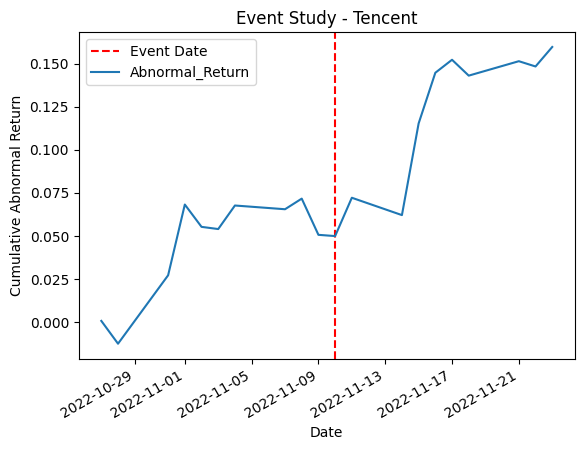

In [ ]:
plot_cumulative_abnormal_returns(event_window_tencent, "Tencent")

## Baidu

In [ ]:
baidu_df = prepare_stock_data('BIDU', start_date, end_date)
baidu_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,200.899994,202.979996,196.130005,202.470001,6151300,0.0,0.0,2015-05-01,NaN
1,204.990005,206.899994,203.520004,203.699997,4397100,0.0,0.0,2015-05-04,0.006057
2,201.820007,201.990005,192.740005,194.740005,7379600,0.0,0.0,2015-05-05,-0.044983
3,194.470001,196.000000,188.610001,190.050003,6736100,0.0,0.0,2015-05-06,-0.024378
4,192.089996,194.619995,191.070007,193.630005,4165200,0.0,0.0,2015-05-07,0.018662
...,...,...,...,...,...,...,...,...,...
2358,83.879997,84.089996,83.330002,83.650002,1983000,0.0,0.0,2024-09-13,-0.005008
2359,84.599998,85.050003,83.889999,84.080002,1614600,0.0,0.0,2024-09-16,0.005127
2360,85.010002,86.739998,84.970001,85.389999,1794300,0.0,0.0,2024-09-17,0.015460
2361,85.559998,85.650002,84.199997,84.669998,1601300,0.0,0.0,2024-09-18,-0.008468


In [ ]:
df_merge_baidu = pd.merge(baidu_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_baidu['date'] = pd.to_datetime(df_merge_baidu['date'])
df_merge_baidu

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,204.990005,206.899994,203.520004,203.699997,4397100,0.0,0.0,2015-05-04,0.006057,0.002936
1,201.820007,201.990005,192.740005,194.740005,7379600,0.0,0.0,2015-05-05,-0.044983,-0.011908
2,194.470001,196.000000,188.610001,190.050003,6736100,0.0,0.0,2015-05-06,-0.024378,-0.004466
3,192.089996,194.619995,191.070007,193.630005,4165200,0.0,0.0,2015-05-07,0.018662,0.003767
4,195.789993,195.899994,191.630005,193.539993,2863800,0.0,0.0,2015-05-08,-0.000465,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,83.879997,84.089996,83.330002,83.650002,1983000,0.0,0.0,2024-09-13,-0.005008,0.005393
2358,84.599998,85.050003,83.889999,84.080002,1614600,0.0,0.0,2024-09-16,0.005127,0.001256
2359,85.010002,86.739998,84.970001,85.389999,1794300,0.0,0.0,2024-09-17,0.015460,0.000265
2360,85.559998,85.650002,84.199997,84.669998,1601300,0.0,0.0,2024-09-18,-0.008468,-0.002901


In [ ]:
event_window_baidu = get_event_window(df_merge_baidu,event_date)
print(len(event_window_baidu))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_baidu = get_estimation_window(df_merge_baidu,event_date)
print(len(estimation_window_baidu))

20
120


In [ ]:
event_window_baidu = calculate_abnormal_returns(event_window_baidu, estimation_window_baidu)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

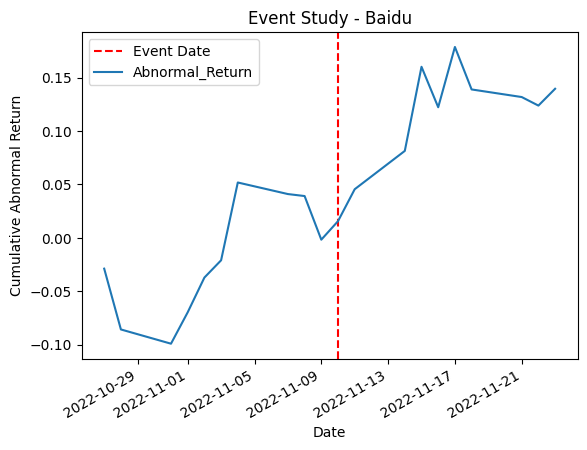

In [ ]:
plot_cumulative_abnormal_returns(event_window_baidu, "Baidu")

## Netease

In [ ]:
netease_df = prepare_stock_data('NTES', start_date, end_date)
netease_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,22.008811,22.056824,21.478953,21.672720,3120500,0.0,0.0,2015-05-01,NaN
1,21.830479,22.427213,21.672722,21.945368,2909500,0.0,0.0,2015-05-04,0.012502
2,21.953941,22.012242,21.454948,21.485813,2974500,0.0,0.0,2015-05-05,-0.021163
3,21.537256,21.588698,20.921660,21.142862,3169500,0.0,0.0,2015-05-06,-0.016090
4,21.352060,21.972800,21.261179,21.863056,5173500,0.0,0.0,2015-05-07,0.033496
...,...,...,...,...,...,...,...,...,...
2358,76.980003,77.760002,76.980003,77.320000,1022000,0.0,0.0,2024-09-13,0.001812
2359,77.370003,77.699997,76.599998,76.779999,1393700,0.0,0.0,2024-09-16,-0.007008
2360,77.230003,78.330002,76.989998,77.019997,747100,0.0,0.0,2024-09-17,0.003121
2361,77.290001,78.000000,76.639999,76.699997,505500,0.0,0.0,2024-09-18,-0.004163


In [ ]:
df_merge_netease = pd.merge(netease_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_netease['date'] = pd.to_datetime(df_merge_netease['date'])
df_merge_netease

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,21.830479,22.427213,21.672722,21.945368,2909500,0.0,0.0,2015-05-04,0.012502,0.002936
1,21.953941,22.012242,21.454948,21.485813,2974500,0.0,0.0,2015-05-05,-0.021163,-0.011908
2,21.537256,21.588698,20.921660,21.142862,3169500,0.0,0.0,2015-05-06,-0.016090,-0.004466
3,21.352060,21.972800,21.261179,21.863056,5173500,0.0,0.0,2015-05-07,0.033496,0.003767
4,22.291739,22.358614,21.695007,22.159704,2868000,0.0,0.0,2015-05-08,0.013477,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,76.980003,77.760002,76.980003,77.320000,1022000,0.0,0.0,2024-09-13,0.001812,0.005393
2358,77.370003,77.699997,76.599998,76.779999,1393700,0.0,0.0,2024-09-16,-0.007008,0.001256
2359,77.230003,78.330002,76.989998,77.019997,747100,0.0,0.0,2024-09-17,0.003121,0.000265
2360,77.290001,78.000000,76.639999,76.699997,505500,0.0,0.0,2024-09-18,-0.004163,-0.002901


In [ ]:
event_window_netease = get_event_window(df_merge_netease,event_date)
print(len(event_window_netease))

event_estimation_netease = get_estimation_window(df_merge_netease,event_date)
print(len(event_estimation_netease))

20
120


In [ ]:
event_window_netease = calculate_abnormal_returns(event_window_netease, event_estimation_netease)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

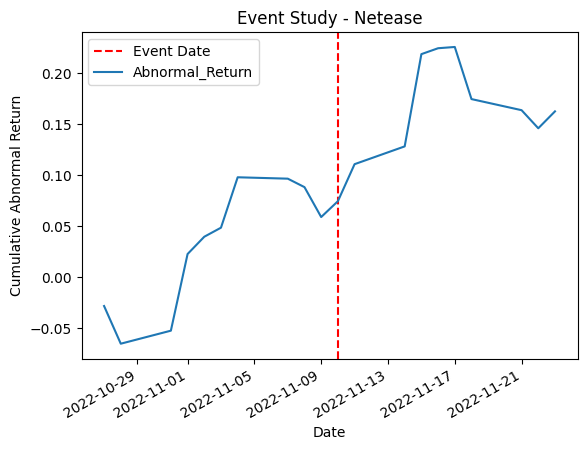

In [ ]:
plot_cumulative_abnormal_returns(event_window_netease, "Netease")

## Alibaba

In [ ]:
baba_df = prepare_stock_data('BABA', start_date, end_date)
baba_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,78.254445,79.432657,77.365959,78.389648,17910500,0.0,0.0,2015-05-01,NaN
1,78.389648,78.766289,77.375619,77.829514,21551500,0.0,0.0,2015-05-04,-0.007171
2,77.684664,78.128907,75.106115,76.815491,32661900,0.0,0.0,2015-05-05,-0.013114
3,76.921718,78.080611,76.786514,77.259727,24953500,0.0,0.0,2015-05-06,0.005767
4,85.787279,86.231522,82.001554,83.054214,69448800,0.0,0.0,2015-05-07,0.072321
...,...,...,...,...,...,...,...,...,...
2358,84.389999,84.889999,83.820000,84.690002,8985500,0.0,0.0,2024-09-13,-0.009402
2359,84.035004,84.379997,83.260002,83.599998,11298200,0.0,0.0,2024-09-16,-0.012954
2360,84.820000,85.769997,84.629997,84.699997,10113900,0.0,0.0,2024-09-17,0.013072
2361,84.849998,85.000000,84.040001,84.419998,7858800,0.0,0.0,2024-09-18,-0.003311


In [ ]:
df_merge_baba = pd.merge(baba_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_baba['date'] = pd.to_datetime(df_merge_baba['date'])
df_merge_baba

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,78.389648,78.766289,77.375619,77.829514,21551500,0.0,0.0,2015-05-04,-0.007171,0.002936
1,77.684664,78.128907,75.106115,76.815491,32661900,0.0,0.0,2015-05-05,-0.013114,-0.011908
2,76.921718,78.080611,76.786514,77.259727,24953500,0.0,0.0,2015-05-06,0.005767,-0.004466
3,85.787279,86.231522,82.001554,83.054214,69448800,0.0,0.0,2015-05-07,0.072321,0.003767
4,84.811873,85.246456,83.913729,84.077904,30140600,0.0,0.0,2015-05-08,0.012250,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,84.389999,84.889999,83.820000,84.690002,8985500,0.0,0.0,2024-09-13,-0.009402,0.005393
2358,84.035004,84.379997,83.260002,83.599998,11298200,0.0,0.0,2024-09-16,-0.012954,0.001256
2359,84.820000,85.769997,84.629997,84.699997,10113900,0.0,0.0,2024-09-17,0.013072,0.000265
2360,84.849998,85.000000,84.040001,84.419998,7858800,0.0,0.0,2024-09-18,-0.003311,-0.002901


In [ ]:
event_window_baba = get_event_window(df_merge_baba, event_date)
print(len(event_window_baba))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_baba = get_estimation_window(df_merge_baba,event_date)
print(len(estimation_window_baba))

20
120


In [ ]:
event_window_baba = calculate_abnormal_returns(event_window_baba, estimation_window_baba)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

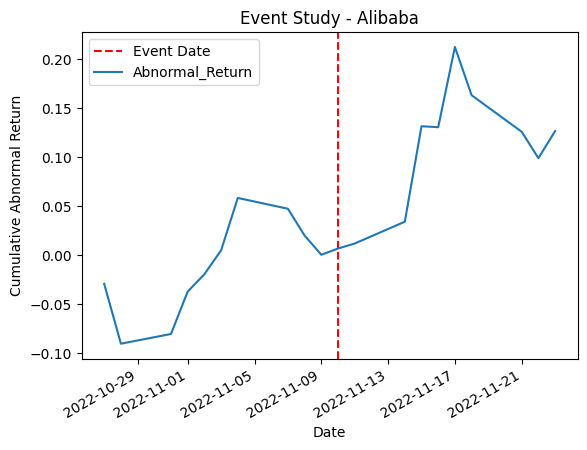

In [ ]:
plot_cumulative_abnormal_returns(event_window_baba, "Alibaba")

## JD

In [ ]:
JD_df = prepare_stock_data('JD', start_date, end_date)
JD_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return
0,31.649209,31.761307,30.556245,31.322252,5292600,0.0,0.0,2015-05-01,NaN
1,31.770649,32.611391,31.481063,32.032215,7758900,0.0,0.0,2015-05-04,0.022413
2,31.761306,31.892087,30.967275,31.481060,4681500,0.0,0.0,2015-05-05,-0.017356
3,31.340937,31.434355,30.247976,30.341391,7477000,0.0,0.0,2015-05-06,-0.036873
4,31.574474,31.574474,30.229291,30.901884,10170000,0.0,0.0,2015-05-07,0.018304
...,...,...,...,...,...,...,...,...,...
2358,26.590000,26.650000,26.120001,26.240000,9395800,0.0,0.0,2024-09-13,-0.015504
2359,26.360001,26.440001,26.174999,26.299999,6960900,0.0,0.0,2024-09-16,0.002284
2360,26.660000,27.389999,26.629999,26.920000,15021400,0.0,0.0,2024-09-17,0.023301
2361,27.020000,27.135000,26.670000,26.920000,10352800,0.0,0.0,2024-09-18,0.000000


In [ ]:
df_merge_JD = pd.merge(JD_df, sp_index_data[['date','Market Return']] ,left_on='date',right_on='date',  how='left').dropna().reset_index(drop=True)
df_merge_JD['date'] = pd.to_datetime(df_merge_JD['date'])
df_merge_JD

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Return,Market Return
0,31.770649,32.611391,31.481063,32.032215,7758900,0.0,0.0,2015-05-04,0.022413,0.002936
1,31.761306,31.892087,30.967275,31.481060,4681500,0.0,0.0,2015-05-05,-0.017356,-0.011908
2,31.340937,31.434355,30.247976,30.341391,7477000,0.0,0.0,2015-05-06,-0.036873,-0.004466
3,31.574474,31.574474,30.229291,30.901884,10170000,0.0,0.0,2015-05-07,0.018304,0.003767
4,30.789783,31.621181,29.986408,31.518427,11417200,0.0,0.0,2015-05-08,0.019755,0.013368
...,...,...,...,...,...,...,...,...,...,...
2357,26.590000,26.650000,26.120001,26.240000,9395800,0.0,0.0,2024-09-13,-0.015504,0.005393
2358,26.360001,26.440001,26.174999,26.299999,6960900,0.0,0.0,2024-09-16,0.002284,0.001256
2359,26.660000,27.389999,26.629999,26.920000,15021400,0.0,0.0,2024-09-17,0.023301,0.000265
2360,27.020000,27.135000,26.670000,26.920000,10352800,0.0,0.0,2024-09-18,0.000000,-0.002901


In [ ]:
event_window_JD = get_event_window(df_merge_JD, event_date)
print(len(event_window_JD))
# Estimation window [-130, -11] (120 trading days before the event window)
estimation_window_JD = get_estimation_window(df_merge_JD,event_date)
print(len(estimation_window_JD))

20
120


In [ ]:
event_window_JD = calculate_abnormal_returns(event_window_JD, estimation_window_JD)

<ipython-input-5-6c4f4023f8cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Expected_Return'] = alpha + beta * event_window['Market Return']
<ipython-input-5-6c4f4023f8cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window['Abnormal_Return'] = event_window['Return'] - event_window['Expected_Return']
<ipython-input-5-6c4f4023f8cc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

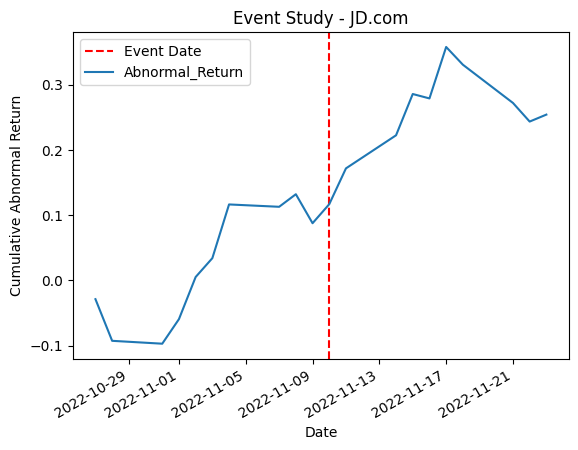

In [ ]:
plot_cumulative_abnormal_returns(event_window_JD, "JD.com")